In [ ]:
#Notebook purpose:   

###plot all the figures to be used in the computational optogenetics paper

# Helper functions

In [19]:
# import statements:
import run_analysis
import os
print os.getcwd()
os.chdir('/home/sjarvis1/workspace/co_optogenetics')
print os.getcwd()
import numpy as np
import math
%load_ext autoreload
%autoreload 2
reload(run_analysis)
import file_io as fio

/home/sjarvis1/workspace/co_optogenetics
/home/sjarvis1/workspace/co_optogenetics
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import pylab
%pylab inline
reload(run_analysis)
from run_analysis import ExperimentPlotter
from matplotlib import cm, colors


rc_poster_params =  {'lw': 4, 
                      'lines.linewidth':4,
                      'axes.linewidth':2,
                      'dpi':300,
                      'figure.dpi':300,
                      'figure.figsize' : (4, 4),
                      'savefig.dpi':300,
                      'lw_fine':2,
                      'alpha':0.75,
                      'font.size':16,}

pylab.rcParams.update(rc_poster_params)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
def plot_trialSet(basenames,trialInstances,variables,trials,trialLabels,labels,var_format,exp_params={},extractSpikes=True):
    """
    
    
    """
    af = run_analysis.AnalyticFrame()
    # set tstart,tstop for each experiment - technically don't have to do this, as the analysis has already been performed
    af.update_params(exp_params)
    # set up data structure for each experiment
    af.populate_trialset(basenames, trialInstances, variables, trials, trialLabels, labels, var_format)
    for exp in af.experimentset:
        exp.load_experiments()
        exp.collate_results()
    return af# helper functions

def plot_experiment(expname, expdescript, explabel, variables, exp_params={}):
    """
    This assumes that the analysis (i.e. extract spikes and calculate FI/FI_bg/etc) has already been performed
    
    @param
        expname
        expdescript     array of experiment names to go in one set
        explabel        
        variables       array of the variable we're looping over i.e. factors
        exp_params      dictionary of setup params for that experiment i.e. {"tstart":100,"tstart_bg":50} etc
    """
    af = run_analysis.AnalyticFrame()
    # set tstart,tstop for each experiment - technically don't have to do this, as the analysis has already been performed
    af.update_params(exp_params)
    # set up data structure for each experiment
    af.populate_expset(expname,expdescript,explabel, [variables])
    # These three next lines help when AF complains of not having a results.pkl file for an experiment
    #af.submenu_extractSpikes()
    #af.submenu_runFI()
    #af.submenu_save()
    # load *results.pkl for each experiment
    af.submenu_load()
    # return AnalyticFrame for further plotting, etc.
    return af
    
""" 
def plot_trialSet(basenames,trialInstances,variables,trials,trialLabels,labels,var_format,exp_params={},extractSpikes=True):
    ""
    
    #asdasd
    ""
    af = run_analysis.AnalyticFrame()
    # set tstart,tstop for each experiment - technically don't have to do this, as the analysis has already been performed
    af.update_params(exp_params)
    # set up data structure for each experiment
    af.populate_trialset(basenames, trialInstances, variables, trials, trialLabels, labels, var_format)
    for exp in af.experimentset:
        exp.load_experiments()
        exp.collate_results()
    return af
"""
    
def convert_expData(data):
    """
    Helper function to wrap the data --> af format
    """
    newdata= {'tstart':data['light_on'],'tstop':data['light_on']+data['light_dur'],
                              'tstart_bg': 50,'tstop_bg':data['light_on'],
                              'tstart_post':data['light_on']+data['light_dur'],'tstop_post':data['tstop']}
    return newdata


def run_exp(expname, expdescript, explabel, variables, exp_params={}):
    """
    Helper function to briefly run new files
    """
    af = run_analysis.AnalyticFrame()
    # set tstart,tstop for each experiment - technically don't have to do this, as the analysis has already been performed
    af.update_params(exp_params)
    # set up data structure for each experiment
    af.populate_expset(expname,expdescript,explabel, [variables])
    
    af.submenu_extractSpikes()
    af.submenu_save()
    return af

In [4]:
def turn_off_border(ax,turnoffs=['right','top']):
    for loc, spine in ax.spines.iteritems():
        print loc
        if loc not in turnoffs:
            ax.spines[loc].set_position(('outward',5))
            #ax.spines[loc].set_visible(True)
            #spine.set_position(('outward',5))
            #ax.tick_params(direction='out')
            #spine.set_visible(True)
        elif loc in turnoffs:
            #spine.set_color('none') # don't draw spine
            #spine.set_visible(False)
            #ax.tick_params([])
            ax.spines[loc].set_visible(False)
    #ax.xaxis.set_ticks_position('bottom')
    #ax.yaxis.set_ticks_position('left')

#### TODO:

* supress stdout -->DONE: add %%capture as first line in each cell when working
* set cmap for each plot --> DONEadded function to AnalyticFrame that allows update of cmap
* add fitting of $log$.$H(\theta)$ for stellate neurons --> DONE (but it's not working great)
* add fitting of powerlaw for stellate neurons --> DONE, and works great! :)
* define own colormaps in AF --> DONE. Using af.update_cmap(9) to use BLUE-->ORANGE
* save plots as svg (or next best) format --> DONE
* repeat Fig2 in vitro for same irradiance as in vivo (i.e. irr = 0.002)
* repeat Fig2 in vivo for high irradiance to obtain gain modulation curve --> DONE. Output = NpHR.factor
* in vitro experiments to I>=3Amp so that response is saturated --> DONE

# Figure 1: Abstract neurons

Relevant experiments:

*      140305_compare_equal_branches



In [567]:
light_on = 1000
light_dur = 1500
tstop = 3500
factors = [0.5,2,1.5,1.,0.75,1.25]
factors.sort()
exp = 'whole'
Js = [2.]
freqs = range(10,101,10)
descript = 'distal'


def generate_abstract_FI(tree):
    af = run_analysis.AnalyticFrame()
    af.update_params({'tstart':light_on,'tstop':light_on+light_dur, 
                     'tstart_bg': 0,'tstop_bg':light_on,
                     'tstart_post':light_on+light_dur,'tstop_post':tstop})



    exp_comp_list = [['irr0.05'+'_factor%.2f'%(factor)+'_nb%g_ns%g_nl%g_'%(tree[0],tree[1],tree[2])+'spikes%g'+'_loc%g_J%.1f'%(tree[2]-1,Js[0])+'_NpHR_%s_ChR_%s'%(exp,exp),'%g'%factor] for factor in factors]
    print exp_comp_list

    expss = [ec[0] for ec in exp_comp_list]
    explabels = [ec[1] for ec in exp_comp_list]
    af.populate_expset(expbase,expss,explabels,[freqs])


    af.update_cmap(9)
    af.submenu_load()
    af.submenu_print()
    #af.submenu_plot(5, expbase+'FI_gain_irr%.2f_tree%s_varyFactor_exp%s%s_'%(0.05,tree,exp,exp))
    #af.submenu_plot(0, expbase+'FI_gain_irr%.2f_tree%s_varyFactor_exp%s%s_'%(0.05,tree,exp,exp))
    af.submenu_plot(10, expbase+'FI_gain_bg_irr%.2f_tree%s_%s_varyFactor_exp%s%s_'%(0.05,tree,descript,exp,exp))




In [568]:
%%capture
# Plot gain modulation for a 'good' configuration
# 140305_compare_equal_branchesFI_gain_bg_irr0.05_tree(4, 5, 3)_distal_varyFactor_expwholewhole_FIfit_bg_140314__poly

expbase = '140305_compare_equal_branches'
tree = (4, 5, 3)
generate_abstract_FI(tree)


In [10]:
%%capture 
exp = 'whole'
tree = (4, 5, 3)
factors = [0.5,0.75,1.,1.25,1.5,2.]
freqs = range(10,101,10)


af = run_analysis.AnalyticFrame()
af.update_params({'tstart':light_on,'tstop':light_on+light_dur,
                  'tstart_bg': 0,'tstop_bg':light_on,
                  'tstart_post':light_on+light_dur,'tstop_post':tstop})

descript = 'soma'
exp_comp_list = [['irr0.05'+'_factor%.2f'%(factor)+'_nb%g_ns%g_nl%g_'%(tree[0],tree[1],tree[2])+'spikes%g'+'_loc%s_J%.1f'%('soma',Js[0])+'_NpHR_%s_ChR_%s'%(exp,exp),'%g'%factor] for factor in factors]
print exp_comp_list

expss = [ec[0] for ec in exp_comp_list]
explabels = [ec[1] for ec in exp_comp_list]
af.populate_expset(expbase,expss,explabels,[freqs])
af.submenu_extractSpikes()
"""

af.submenu_runFI()
for exp in af.experimentset:
    exp.calculate_responses('FI')
    exp.calculate_responses('FI_bg')
    exp.calculate_responses('FI_post')
af.submenu_save()

"""
af.submenu_load()
#af.submenu_print()
af.submenu_plot(5, 'Fig1_somaInj_nb%g_ns%g_nl%g_'%(tree[0],tree[1],tree[2])+'_inj%s'%(descript))
#af.submenu_plot(0, self.expbase+'FI_gain_irr%.2f_tree%s_varyFactor_exp%s%s_'%(0.05,tree,exp[0],exp[1]))
af.submenu_plot(10,'Fig1_somaInjbg_nb%g_ns%g_nl%g_'%(tree[0],tree[1],tree[2])+'inj%s'%(descript))

NameError: name 'light_on' is not defined

In [9]:
%%capture
# Plot gain modulation for a 'bad' configuration
# 140305_compare_equal_branchesFI_gain_bg_irr0.05_tree(2, 2, 6)_distal_varyFactor_expwholewhole_FIfit_bg_140314__poly
# 140305_compare_equal_branchesFI_gain_bg_irr0.05_tree(2, 61, 2)_distal_varyFactor_exppartialSamepartialSame_FIfit_bg_140314__poly

expbase = '140305_compare_equal_branches'
tree = (2, 2, 6)
generate_abstract_FI(tree)
tree = (2, 61, 2)
generate_abstract_FI(tree)


NameError: name 'generate_abstract_FI' is not defined

In [11]:
#expbase = '140305_compare_equal_branches'
#tree = (1,1,124)
#generate_abstract_FI(tree)

In [ ]:
# Plot M vs branching vs polarity

In [ ]:
# Plot attenuation along branch of each

In [ ]:
# Gain modulation as a function of input location

In [369]:
%%capture
# Photocurrent traces

expbase = '151104_retestAbstractPassive'
trees = [(1,2,7),(2,2,6),(2,61,2),(4,1,31)]
trees = [(1,2,7),(2,2,6),(2,7,3),(4,1,31)]
# plotting fun
lspace = (0.1,0.9)
intensities =  np.linspace(lspace[0], lspace[1], len(factors)+1) 
expPlot = ExperimentPlotter()
expPlot.update_cmap_index(9)

m = cm.ScalarMappable(cmap=expPlot.get_cmap())
m.set_array(intensities)

expAbstract_light = {'filebase': '151104_retestAbstractPassive',
                'light_on': 750,
                'light_dur': 500,
                'tstart':500,
                'tstop': 1500,
                'scalebar': True,
                'scalesizex':100,
                'scalesizey': 5,
                'ymin':-110,
                'figsize':(6,4),
                'factors' : [0.25,0.5,0.75,1.,1.25,1.5,2.,4.],
                'irrs' : [0.002,0.02,0.2,2.0] }#[ a*b for a in [2.0] for b in [0.001,0.01,0.1,1.]]} #np.arange(0.5,5.1,0.5)} # [0.01,0.02,0.001,0.002]


exp = 'whole'
for tree in trees:

    nb,nc,nl = tree

    for irr in expAbstract_light['irrs']:
        exp_descript = [ 'irr%.3f'%irr+'_factor%.2f'+'_nb%g_ns%g_nl%g_Intrinsicphotosample'%(nb,nc,nl)+'_NpHR_%s_ChR_%s'%(exp,exp)]
        #basename = 'irr%.3f_factor%.2f_nb%g_ns%g_nl%g_Intrinsic'%(irr,factor,nb,nc,nl)+'_NpHR_%s_ChR_%s'%(exp,exp)
        print exp_descript    
        exp_labels = ['%.2f'%f for f in expAbstract_light['factors']]
        #af = run_exp(expL5PC_light['filebase'],exp_descript,exp_labels,expL5PC_light['factors'],convert_expData(expL5PC_light))
        af = plot_experiment(expAbstract_light['filebase'],exp_descript,exp_labels,expAbstract_light['factors'],convert_expData(expAbstract_light));
        af.update_cmap(9)
        af.submenu_plot(1,'Fig1_photocurrent_traces_irr%.3f_treenb%g_ns%g_nl%g'%(irr,nb,nc,nl),**expAbstract_light)


IOError: [Errno 2] No such file or directory: 'experiments/151104_retestAbstractPassive/pkl/151104_retestAbstractPassiveirr0.002_factor0.25_nb2_ns7_nl3_Intrinsicphotosample_NpHR_whole_ChR_whole_results.pkl'

In [12]:
%%capture
# IF curves

expbase = '151104_retestAbstractPassive'
trees = [(1,2,7),(2,2,6),(2,61,2),(4,1,31)]
factors = [0.25,0.5,0.75,1.,1.25,1.5,2.,4.]


# plotting fun
lspace = (0.1,0.9)
intensities =  np.linspace(lspace[0], lspace[1], len(factors)+1) 
expPlot = ExperimentPlotter()
expPlot.update_cmap_index(9)

m = cm.ScalarMappable(cmap=expPlot.get_cmap())
m.set_array(intensities)

freqs = range(10,130,10)+range(14,130,10)+range(16,130,10)#range(10,130,2) 
freqs.sort()

JS_LOOKUP = { (1,1,124) : 1.0, #OK
                           (1,2,7) : 1.0, #OK
                           (2,2,6) : 1.9, #OK
                           (2,7,3) : 1.5, #OK
                           (2,1,62) : 1.0, #OK
                           (2,61,2) : 2.0, #grudgingly OK 
                           (4,5,3) : 4.0, # OK
                           (4,2,5) : 2.0, #OK
                           (4,30,2) : 5.0, #OK
                           (4,1,31) : 1.9, #OK
                           (11,1,11) : 2., #OK
                           (11,10,2) : 50., #OK
                           (18,1,7) : 50., #OK
                           (18,2,3) : 50., #OK
                           (18,6,2) : 50., #OK
                           (31,1,4) : 50.,
                           (31,3,2) : 100.,
                           (62,1,2) : 100.,
                           (124,1,1) : 500.,
                          }

expAbstract_light = {'filebase': '151104_retestAbstractPassive',
                'light_on': 750,
                'light_dur': 500,
                'tstart':500,
                'tstop': 1500,
                'scalebar': True,
                'scalesizex':100,
                'scalesizey': 5,
                'ymin':-110,
                'figsize':(6,4),
                'factors' :  factors,
                'freqs' : freqs,
                'irrs' : [0.002,0.02,0.2,2.0] }#[ a*b for a in [2.0] for b in [0.001,0.01,0.1,1.]]} #np.arange(0.5,5.1,0.5)} # [0.01,0.02,0.001,0.002]

exp = 'whole'
for tree in trees:

    nb,nc,nl = tree

    for irr in expAbstract_light['irrs']:
        J = JS_LOOKUP[tree]
        exp_descript = ['irr%.3f'%irr+'_factor%.2f'%(factor)+'_nb%g_ns%g_nl%g_'%(tree[0],tree[1],tree[2])+'spikes%g'+'_loc%s_J%.1f'%(tree[2]-1,J)+'_NpHR_%s_ChR_%s'%(exp,exp) for factor in expAbstract_light['factors']] 
        exp_labels = ['%.2f'%f for f in expAbstract_light['factors']]
        #af = run_exp(expL5PC_light['filebase'],exp_descript,exp_labels,expL5PC_light['factors'],convert_expData(expL5PC_light))
        #af = plot_experiment(expAbstract_light['filebase'],exp_descript,exp_labels,expAbstract_light['freqs'],convert_expData(expAbstract_light));
        #af.update_cmap(9)
        #af.submenu_plot(5,'Fig1_IF_irr%.3f_treenb%g_ns%g_nl%g'%(irr,nb,nc,nl),**expAbstract_light)
        #af.submenu_plot(10,'Fig1_IFbg_irr%.3f_treenb%g_ns%g_nl%g'%(irr,nb,nc,nl),**expAbstract_light)

        

In [140]:
%%capture
reload(run_analysis)
### Calculate MI

buffer = 100
exp = 'whole'

expbase = '151104_retestAbstractPassive'
trees = [(1,2,7),(2,2,6),(2,7,3),(4,1,31)] #,(2,61,2)
factors = [0.25,0.5,0.75,1.,1.25,1.5,2.,4.]
# plotting fun
lspace = (0.1,0.9)
intensities =  np.linspace(lspace[0], lspace[1], len(factors)+1) 
expPlot = ExperimentPlotter()
expPlot.update_cmap_index(9)

m = cm.ScalarMappable(cmap=expPlot.get_cmap())
m.set_array(intensities)

freqs = range(10,130,10) # +range(14,130,10)+range(16,130,10)#range(10,130,2) 
freqs.sort()

JS_LOOKUP = { (1,1,124) : 1.0, #OK
               (1,2,7) : 1.0, #OK
               (2,2,6) : 1.9, #OK
               (2,7,3) : 1.5, #OK
               (2,1,62) : 1.0, #OK
               (2,61,2) : 2.0, #grudgingly OK 
               (4,5,3) : 4.0, # OK
               (4,2,5) : 2.0, #OK
               (4,30,2) : 5.0, #OK
               (4,1,31) : 1.9, #OK
               (11,1,11) : 2., #OK
               (11,10,2) : 50., #OK
               (18,1,7) : 50., #OK
               (18,2,3) : 50., #OK
               (18,6,2) : 50., #OK
               (31,1,4) : 50.,
               (31,3,2) : 100.,
               (62,1,2) : 100.,
               (124,1,1) : 500.}

expAbstract_light = {'filebase': '151104_retestAbstractPassive',
                'light_on': 1000+buffer,
                'light_dur': 1500,
                'tstart':buffer,
                'tstop': 3500,
                'scalebar': True,
                'scalesizex':100,
                'scalesizey': 5,
                'ymin':-5,
                'xmin':-1,
                'ymax':80,
                'figsize':(6,4),
                'factors' :  factors,
                'freqs' : freqs,
                'irrs' : [0.002,0.02,0.2,2.] }#   #,2.0] }#[ a*b for a in [2.0] for b in [0.001,0.01,0.1,1.]]} #np.arange(0.5,5.1,0.5)} # [0.01,0.02,0.001,0.002]

MI = {}
MH = {}
MC = {}
YH = {}
YC = {}
for tree in trees:
    J = JS_LOOKUP[tree]
    MI[tree] = []
    MC[tree] = []
    MH[tree] = []
    YC[tree] = []
    YH[tree] = []
    for irr in expAbstract_light['irrs']:
        af = run_analysis.AnalyticFrame()

        exp_comp_list = [['irr%.3f'%irr+'_factor%.2f'%(factor)+'_nb%g_ns%g_nl%g_'%(tree[0],tree[1],tree[2])+'spikes%g'+'_loc%s_J%.1f'%(tree[2]-1,J)+'_NpHR_%s_ChR_%s'%(exp,exp),'%g'%factor] for factor in expAbstract_light['factors']]
        print exp_comp_list

        expss = [ec[0] for ec in exp_comp_list]
        explabels = [ec[1] for ec in exp_comp_list]
        af.populate_expset(expbase,expss,explabels,expAbstract_light['freqs'])
        
        af.submenu_load()
        """
        af._calculateModulationIndex(ChRlabel=explabels[0],NpHRlabel=explabels[-1],recalc=True)
        af.submenu_save()
        af.submenu_print()
        """
        mChR,mHalo,yChR,yHalo = af._calculateModulationIndex(ChRlabel=explabels[0],NpHRlabel=explabels[-1])
        MC[tree].append(mChR)
        MH[tree].append(mHalo)
        YC[tree].append(yChR)
        YH[tree].append(yHalo)
        # convert to degrees
        mi_ch2 = math.atan(mChR)
        mi_halo = math.atan(mHalo)
        MI[tree].append(mi_ch2-mi_halo)
        

In [367]:
%%capture
for (k,v) in MI.iteritems():
    print k, v

print " "    
for (k,v) in MC.iteritems():
    print k, v

print " "    
for (k,v) in MH.iteritems():
    print k, v

print " "    
for (k,v) in YC.iteritems():
    print k, v
    
print " "    
for (k,v) in YH.iteritems():
    print k, v    

top
right
bottom
left


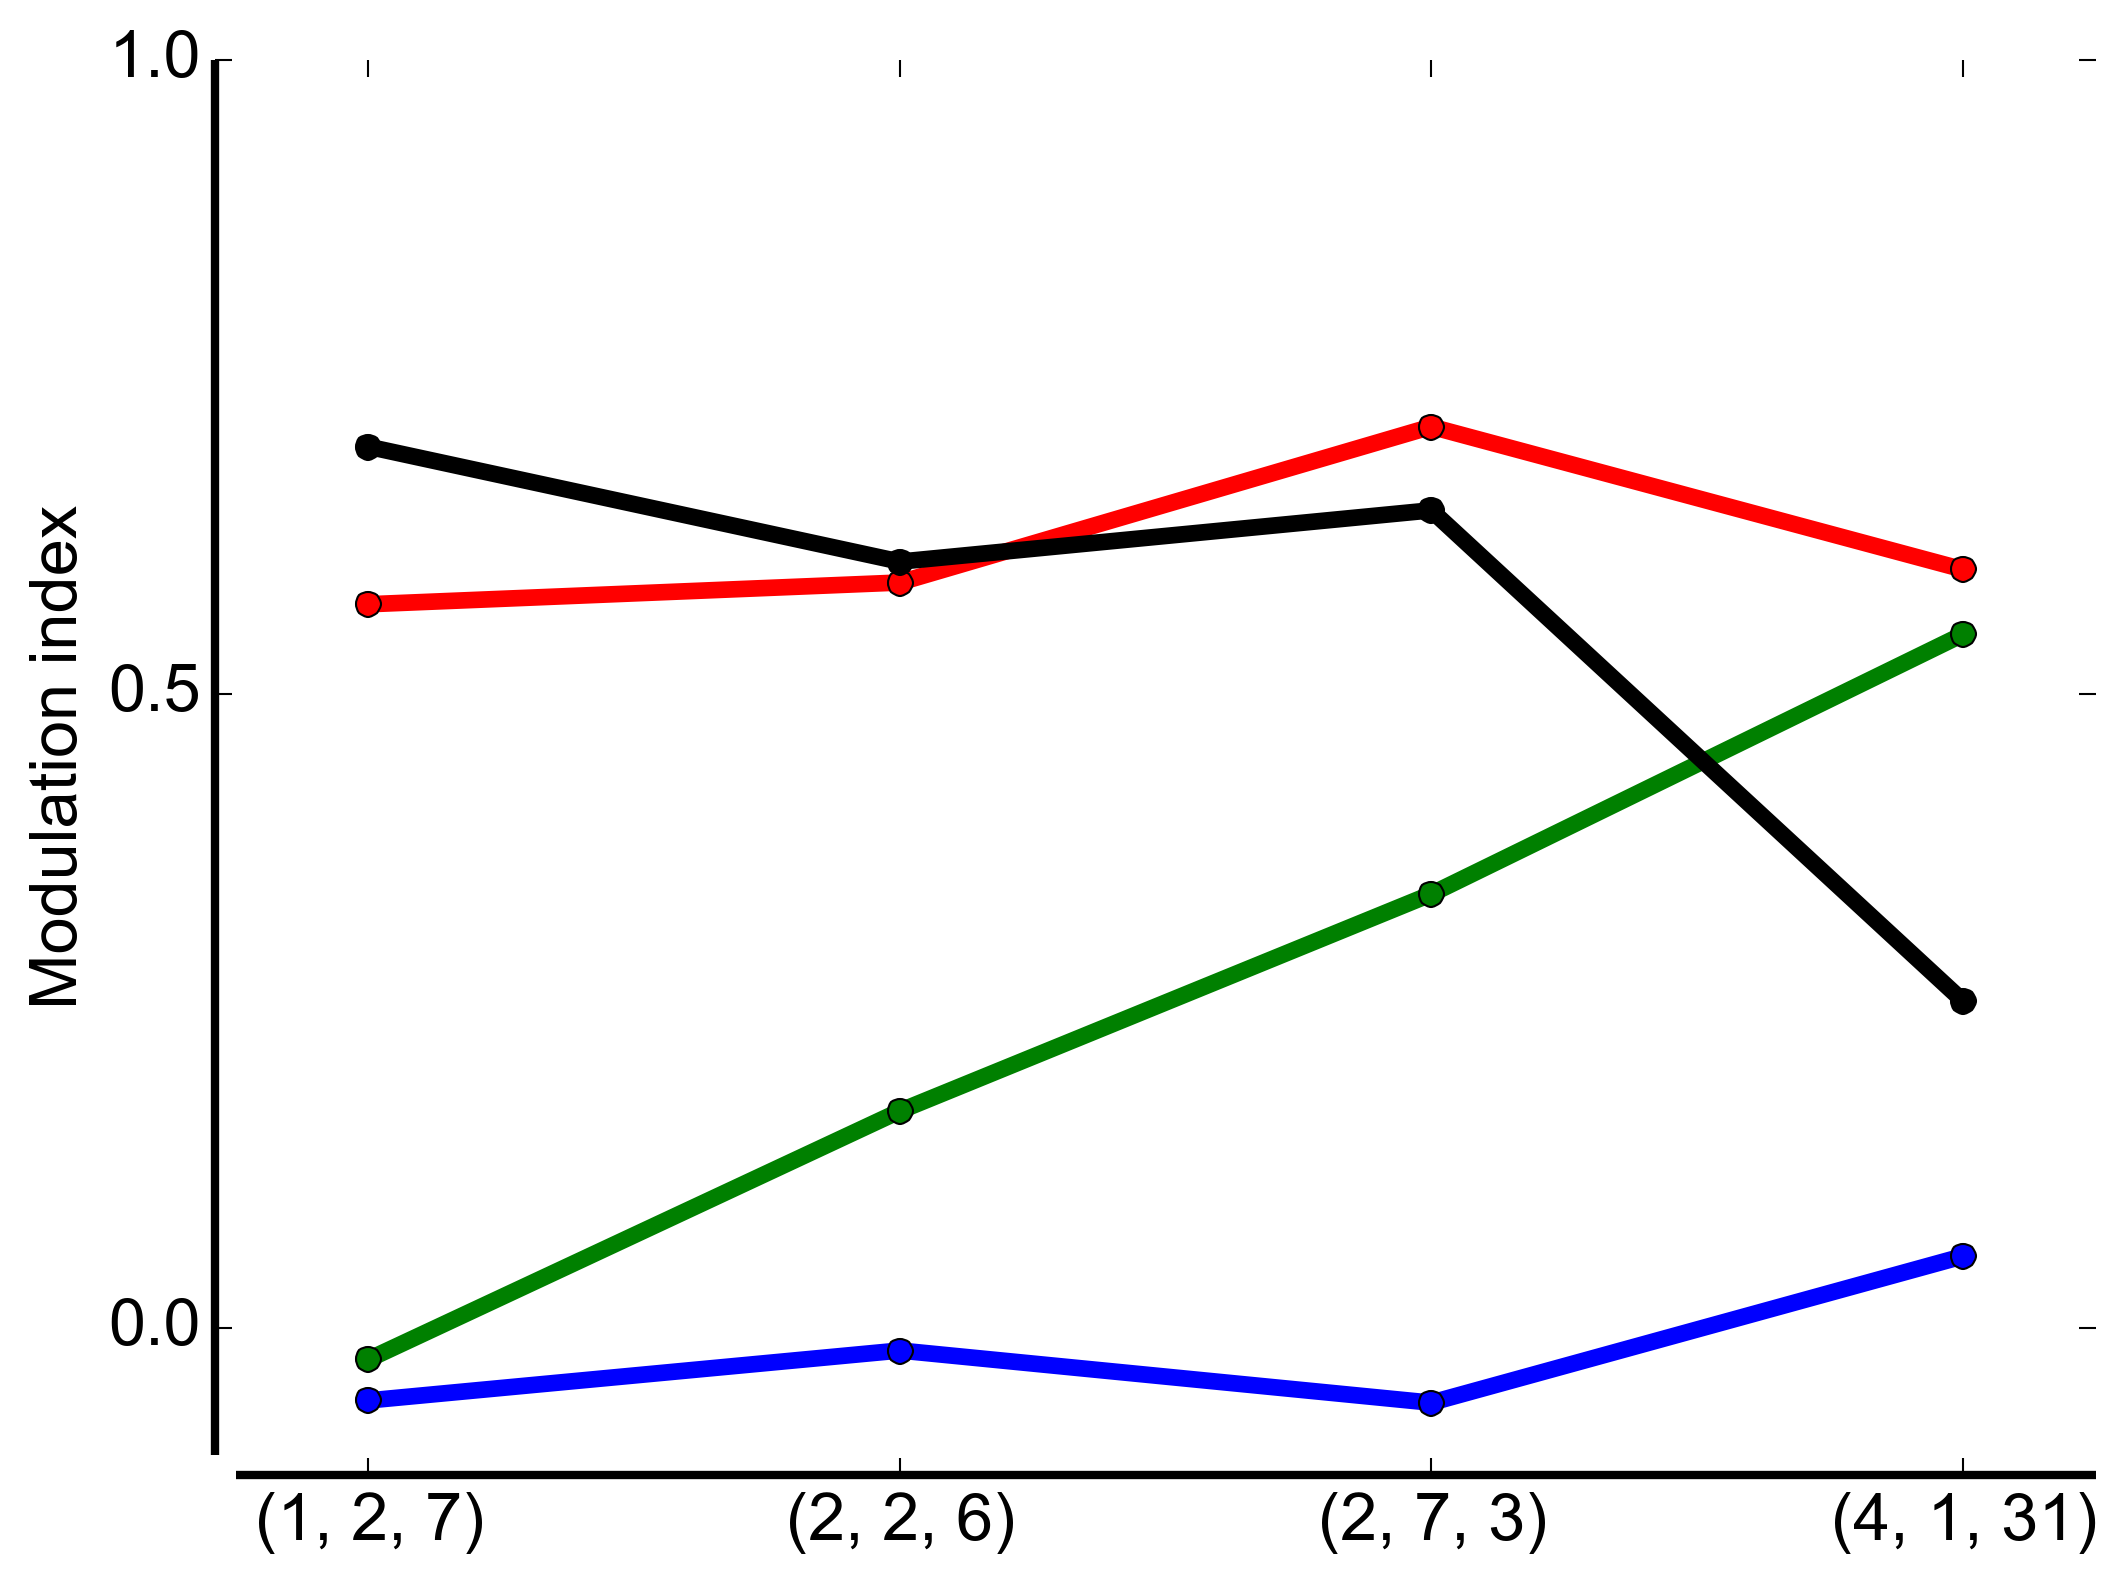

In [370]:
#%%capture
pylab.figure()
colors = ['b','g','r','k']
trees = [(1,2,7),(2, 2, 6),(2, 7, 3),(4, 1, 31)]
"""
# reshape data
newdata = {}
for (i,irr) in enumerate(expAbstract_light['irrs']): 
    newdata[irr] = []
    for (x,tree) in enumerate(trees):
        newdata[irr].append(MI[tree][i])
print newdata     
"""

for (i,irr) in enumerate(expAbstract_light['irrs']): 
    pylab.plot(range(len(trees)),newdata[irr],c=colors[i],marker='o',label=irr)
    
turn_off_border(pylab.gca())
pylab.xticks(range(4),trees)
pylab.yticks([0.,0.5,1.])
pylab.xlim(-0.25,3.25)
pylab.ylabel('Modulation index')
#pylab.legend()


[0.002, 0.02, 0.2, 2.0]
top
right
bottom
left


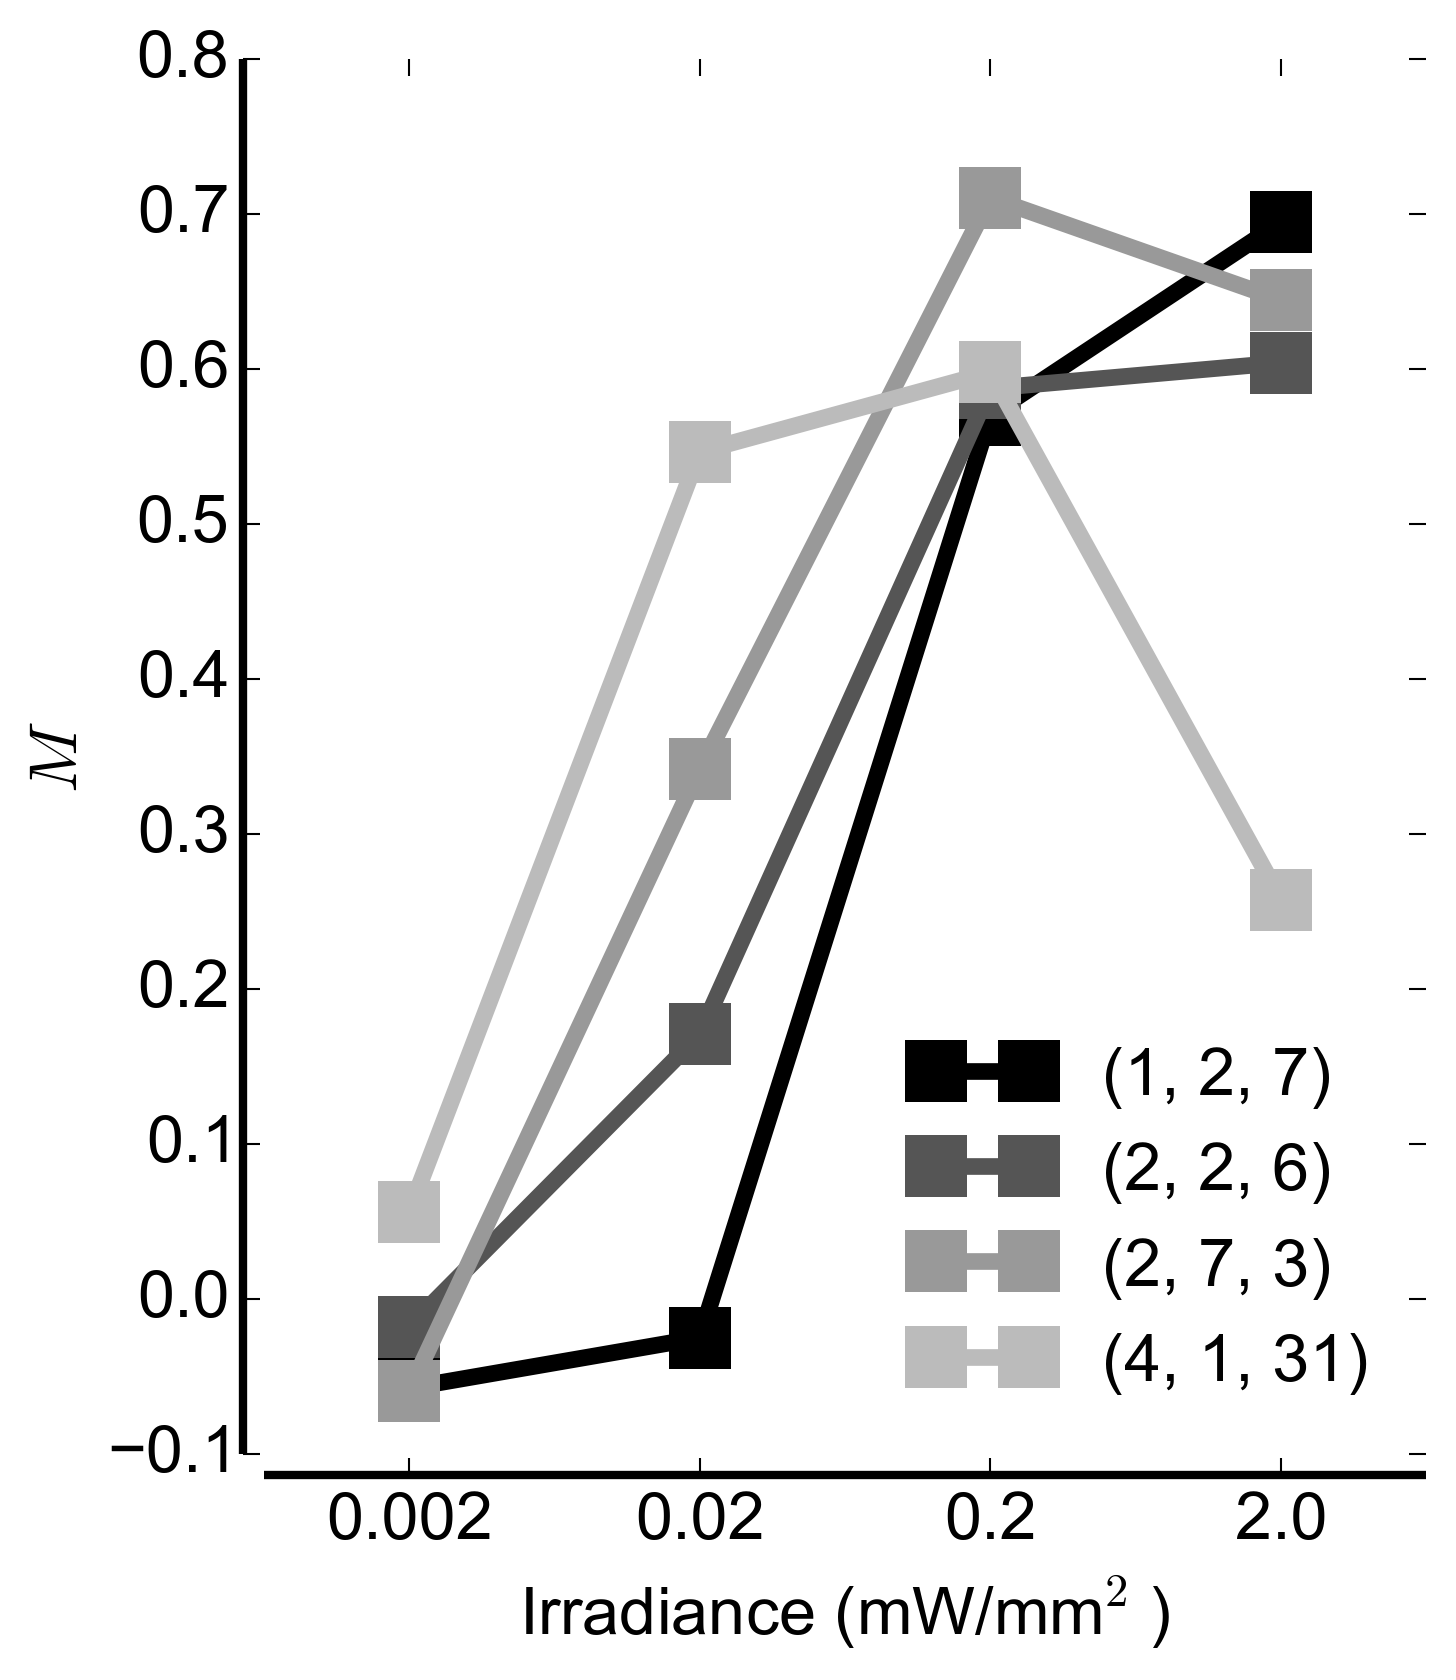

In [401]:
pylab.figure(figsize=(5,6))
irrs = newdata.keys()
irrs.sort()
colors = ['k','#555555','#999999','#bbbbbb']
print irrs
for (t,tree) in enumerate(trees):
    nd = [newdata[irr][t] for irr in irrs]
    pylab.plot(nd,label=tree,marker='s',c=colors[t],mec='none',ms=15)
    
turn_off_border(pylab.gca())
pylab.legend(loc=4,frameon=False,fontsize=16)
pylab.xlim(-0.5,3.5)
pylab.xticks(range(4),irrs)
pylab.ylabel('$M$')
pylab.xlabel('Irradiance (mW/mm$^2$)')
pylab.savefig('Fig1_modulationVsIrradiance.png')
pylab.savefig('Fig1_modulationVsIrradiance.svg')

In [365]:
%%capture   
ydata = {}
for (i,irr) in enumerate(expAbstract_light['irrs']): 
    ydata[irr] = []
    for (x,tree) in enumerate(trees):
        ydata[irr].append(np.abs(YC[tree][i]-YH[tree][i]))
print ydata       

for (i,irr) in enumerate(expAbstract_light['irrs']): 
    pylab.plot(range(len(trees)),ydata[irr],c=colors[i],marker='o',label=irr)
    
turn_off_border(pylab.gca())
pylab.xticks(range(4),trees)
pylab.xlim(-0.25,3.25)
pylab.ylabel('Modulation index')
pylab.legend()



In [392]:
%%capture
# SUMMARY FIGURE
# Photocurrent range
expbase = '151104_retestAbstractPassive'
trees = [(1,1,124),(1,2,7),(2,2,6),(2,7,3),(2,1,62),(2,61,2),(4,5,3),(4,2,5),(4,30,2),(4,1,31),(11,1,11),(11,10,2),(18,1,7),(18,2,3),(18,6,2),(31,1,4)]
factors = [0.25,0.5,0.75,1.,1.25,1.5,2.,4.]
irrs = [ a*b for a in [2.0] for b in [0.001,0.01,0.1,1.]]

# plotting fun
lspace = (0.1,0.9)
intensities =  np.linspace(lspace[0], lspace[1], len(factors)+1) 
expPlot = ExperimentPlotter()
expPlot.update_cmap_index(9)

m = cm.ScalarMappable(cmap=expPlot.get_cmap())
m.set_array(intensities)



exp = 'whole'
for tree in trees:

    nb,nc,nl = tree

    pylab.figure()

    for (x,irr) in enumerate(irrs):
        vals = []
        for (y,factor) in enumerate(factors):
            
            basename = 'irr%.3f_factor%.2f_nb%g_ns%g_nl%g_Intrinsic'%(irr,factor,nb,nc,nl)+'_NpHR_%s_ChR_%s'%(exp,exp)
            try: 
                fnameChR = fio.loaddat(basename, expbase, dattype='iChR')
                fnameNpHR = fio.loaddat(basename,expbase,  dattype='iNpHR')

                iChR = np.loadtxt(fnameChR)[1][-1]
                iHalo = np.loadtxt(fnameNpHR)[1][-1]
            except:
                continue
                #print iChR, iHalo, '------------------------------'
            
            c=expPlot._get_color(m,intensities[y])
            pylab.scatter(x,iChR+iHalo,c=c,s=100,marker='s',alpha=0.7,lw=0)
            
    turn_off_border(pylab.gca())    
    
    pylab.ylabel(r'Net $I_{photo}$ (nA)')
    pylab.xticks(range(len(irrs)),irrs)
    pylab.xlabel('Irradiance (a.u.)')
    pylab.savefig('Fig1_IntrinsicPhoto_'+'_nb%g_ns%g_nl%g_Intrinsic_photoCurrentRange'%(nb,nc,nl)+'.svg',dpi=200)
    pylab.yscale('log')
    pylab.savefig('Fig1_IntrinsicPhoto_'+'_nb%g_ns%g_nl%g_Intrinsic_photoCurrentRange_log'%(nb,nc,nl)+'.svg',dpi=200)
    

In [192]:
%%capture
reload(run_analysis)
### Calculate MI

buffer = 100
exp = 'whole'

expbase = '151104_retestAbstractPassive'
trees = [(1,1,124),(1,2,7),(2,2,6),(2,7,3),(2,1,62),(2,61,2),(4,5,3),(4,2,5),(4,30,2),(4,1,31),(11,1,11),(11,10,2),(18,1,7),(18,2,3),(18,6,2),(31,1,4)]
factors = [0.25,4.]
# plotting fun
lspace = (0.1,0.9)
intensities =  np.linspace(lspace[0], lspace[1], len(factors)+1) 
expPlot = ExperimentPlotter()
expPlot.update_cmap_index(9)

m = cm.ScalarMappable(cmap=expPlot.get_cmap())
m.set_array(intensities)

freqs = range(10,130,10) # +range(14,130,10)+range(16,130,10)#range(10,130,2) 
freqs.sort()

JS_LOOKUP = { (1,1,124) : 1.0, #OK
               (1,2,7) : 1.0, #OK
               (2,2,6) : 1.9, #OK
               (2,7,3) : 1.5, #OK
               (2,1,62) : 1.0, #OK
               (2,61,2) : 2.0, #grudgingly OK 
               (4,5,3) : 4.0, # OK
               (4,2,5) : 2.0, #OK
               (4,30,2) : 5.0, #OK
               (4,1,31) : 1.9, #OK
               (11,1,11) : 2., #OK
               (11,10,2) : 50., #OK
               (18,1,7) : 50., #OK
               (18,2,3) : 50., #OK
               (18,6,2) : 50., #OK
               (31,1,4) : 50.,
               (31,3,2) : 100.,
               (62,1,2) : 100.,
               (124,1,1) : 500.}

expAbstract_light = {'filebase': '151104_retestAbstractPassive',
                'light_on': 1000+buffer,
                'light_dur': 1500,
                'tstart':buffer,
                'tstop': 3500,
                'scalebar': True,
                'scalesizex':100,
                'scalesizey': 5,
                'ymin':-5,
                'xmin':-1,
                'ymax':80,
                'figsize':(6,4),
                'factors' :  factors,
                'freqs' : freqs,
                'irrs' : [0.002,0.02,0.2] }
MI = {}
MH = {}
MC = {}
YH = {}
YC = {}
for tree in trees:
    J = JS_LOOKUP[tree]
    MI[tree] = []
    MC[tree] = []
    MH[tree] = []
    YC[tree] = []
    YH[tree] = []
    for irr in expAbstract_light['irrs']:
        af = run_analysis.AnalyticFrame()

        exp_comp_list = [['irr%.3f'%irr+'_factor%.2f'%(factor)+'_nb%g_ns%g_nl%g_'%(tree[0],tree[1],tree[2])+'spikes%g'+'_loc%s_J%.1f'%(tree[2]-1,J)+'_NpHR_%s_ChR_%s'%(exp,exp),'%g'%factor] for factor in expAbstract_light['factors']]
        print exp_comp_list

        expss = [ec[0] for ec in exp_comp_list]
        explabels = [ec[1] for ec in exp_comp_list]
        af.populate_expset(expbase,expss,explabels,expAbstract_light['freqs'])
        
        af.submenu_load()
        
        af._calculateModulationIndex(ChRlabel=explabels[0],NpHRlabel=explabels[-1],recalc=True)
        af.submenu_save()
        af.submenu_print()
        #""
        mChR,mHalo,yChR,yHalo = af._calculateModulationIndex(ChRlabel=explabels[0],NpHRlabel=explabels[-1])
        MC[tree].append(mChR)
        MH[tree].append(mHalo)
        YC[tree].append(yChR)
        YH[tree].append(yHalo)
        # convert to degrees
        mi_ch2 = math.atan(mChR)
        mi_halo = math.atan(mHalo)
        MI[tree].append(mi_ch2-mi_halo)
        #""

In [317]:
print MI
print MI.keys()

# from some of the data, there are trees that we should ignore:
# (11,1,11)
# (31,1,4)
MI.pop((11,1,11))
MI.pop((31,1,4))

{(31, 1, 4): [0.0, 0.7853981633974483, 0.0], (11, 1, 11): [0.5288815489060089, 0.8519663275426396, -1.664034114997323e-17], (4, 5, 3): [0.19056470440799056, 0.42711236178923545, 0.5690369262060738], (18, 2, 3): [0.24002693355113147, -0.0010123652621360742, -2.4438410101961405e-26], (1, 2, 7): [-0.05739046245844803, -0.0249902360681431, 0.5704392978589323], (11, 10, 2): [-0.03448963422255391, 0.14058970604841775, 0.03056171926034141], (2, 61, 2): [0.004989418900724685, 0.18677580642382363, 0.6973890656850695], (2, 7, 3): [-0.05915557628105217, 0.3419471587550787, 0.7104940578043931], (18, 1, 7): [-0.24982072063795446, 0.003896081687017248, -0.0010760888028897482], (2, 1, 62): [0.02303710857046115, 0.24213465388588917, 0.7362256550772763], (1, 1, 124): [-0.021225101799766, -0.08371022823990315, 0.49710567199653705], (4, 2, 5): [0.1588050604693283, 0.7484051183880391, 0.5994769831227341], (4, 30, 2): [0.0842822320646075, 0.4069904792844245, 0.587231758377004], (2, 2, 6): [-0.0179972716347

[0.0, 0.7853981633974483, 0.0]

In [363]:
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata

def plot_scanImage(xs,ys,ws,irr,xlabel='',ylabel='',vmax=1.,vmin=0,axisvalues=None,axislabels=None,minor_ax=None):
    plt.clf()
    cmap = pylab.cm.CMRmap
    fig = plt.figure(figsize=(5,4))
    npts = 500
    # define grid.
    xi = np.linspace(0, np.max(xs), npts)
    yi = np.linspace(0, np.max(ys), npts)
    # grid the data.
    zi = griddata(xs, ys, ws, xi, yi, interp='nn')
    # plot the data
    v = np.linspace(-.1, 1.0, 23, endpoint=True)
    plt.contourf(xi, yi, zi, v, cmap=cmap,vmax=1.4, vmin=-1.4)#, vmax=vmax, vmin=vmin)
    
    cb = plt.colorbar(ticks=[0,0.5,1])#ticks=v)
    cb.set_label("Modulation index $M$")
    cb.ax.tick_params(axis='y', direction='out')
    plt.clim(vmin,vmax)
    # plot data points.
    plt.scatter(xs, ys, marker='o', facecolors='none',edgecolors='#777777', lw=3,s=45, zorder=10)
    #ax = pylab.gca()
    turn_off_border(plt.gca())
    plt.tick_params(which='both', width=2,length=5)
    plt.tick_params(which='major', width=4, length=8)

    if axisvalues is not None:
        plt.xticks(axisvalues,axislabels)
        plt.yticks(axisvalues,axislabels)
    if minor_ax is not None:
        #plt.xticks(minor_ax,minor=True)
        #plt.yticks(minor_ax,minor=True)
        plt.gca().xaxis.set_ticks(minor_ax,minor=True)   
        plt.gca().yaxis.set_ticks(minor_ax,minor=True) 
                   
    #ax.set_xscale("log", nonposx='clip')
    #ax.set_yscale("log", nonposy='clip')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('$M$ for irr=%g'%irr)
    #plt.show()
    return plt.gcf()

top
right
bottom
left


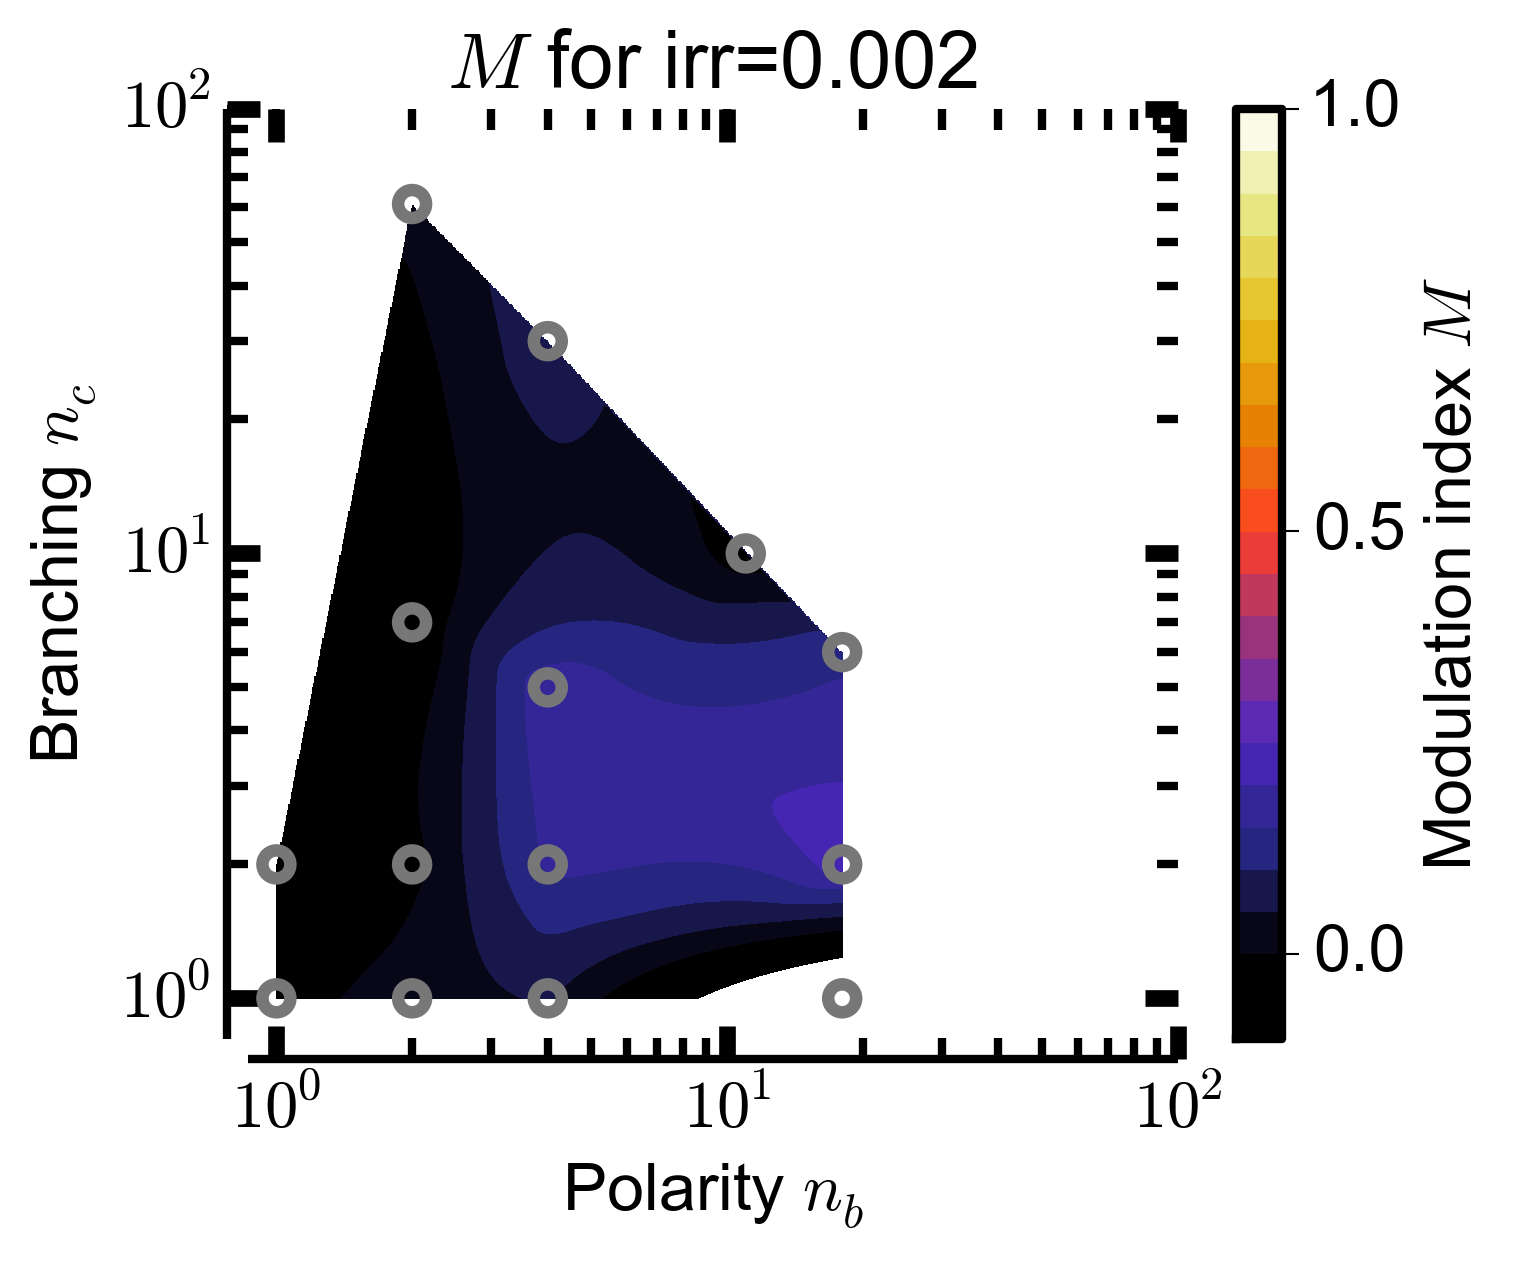

top
right
bottom
left


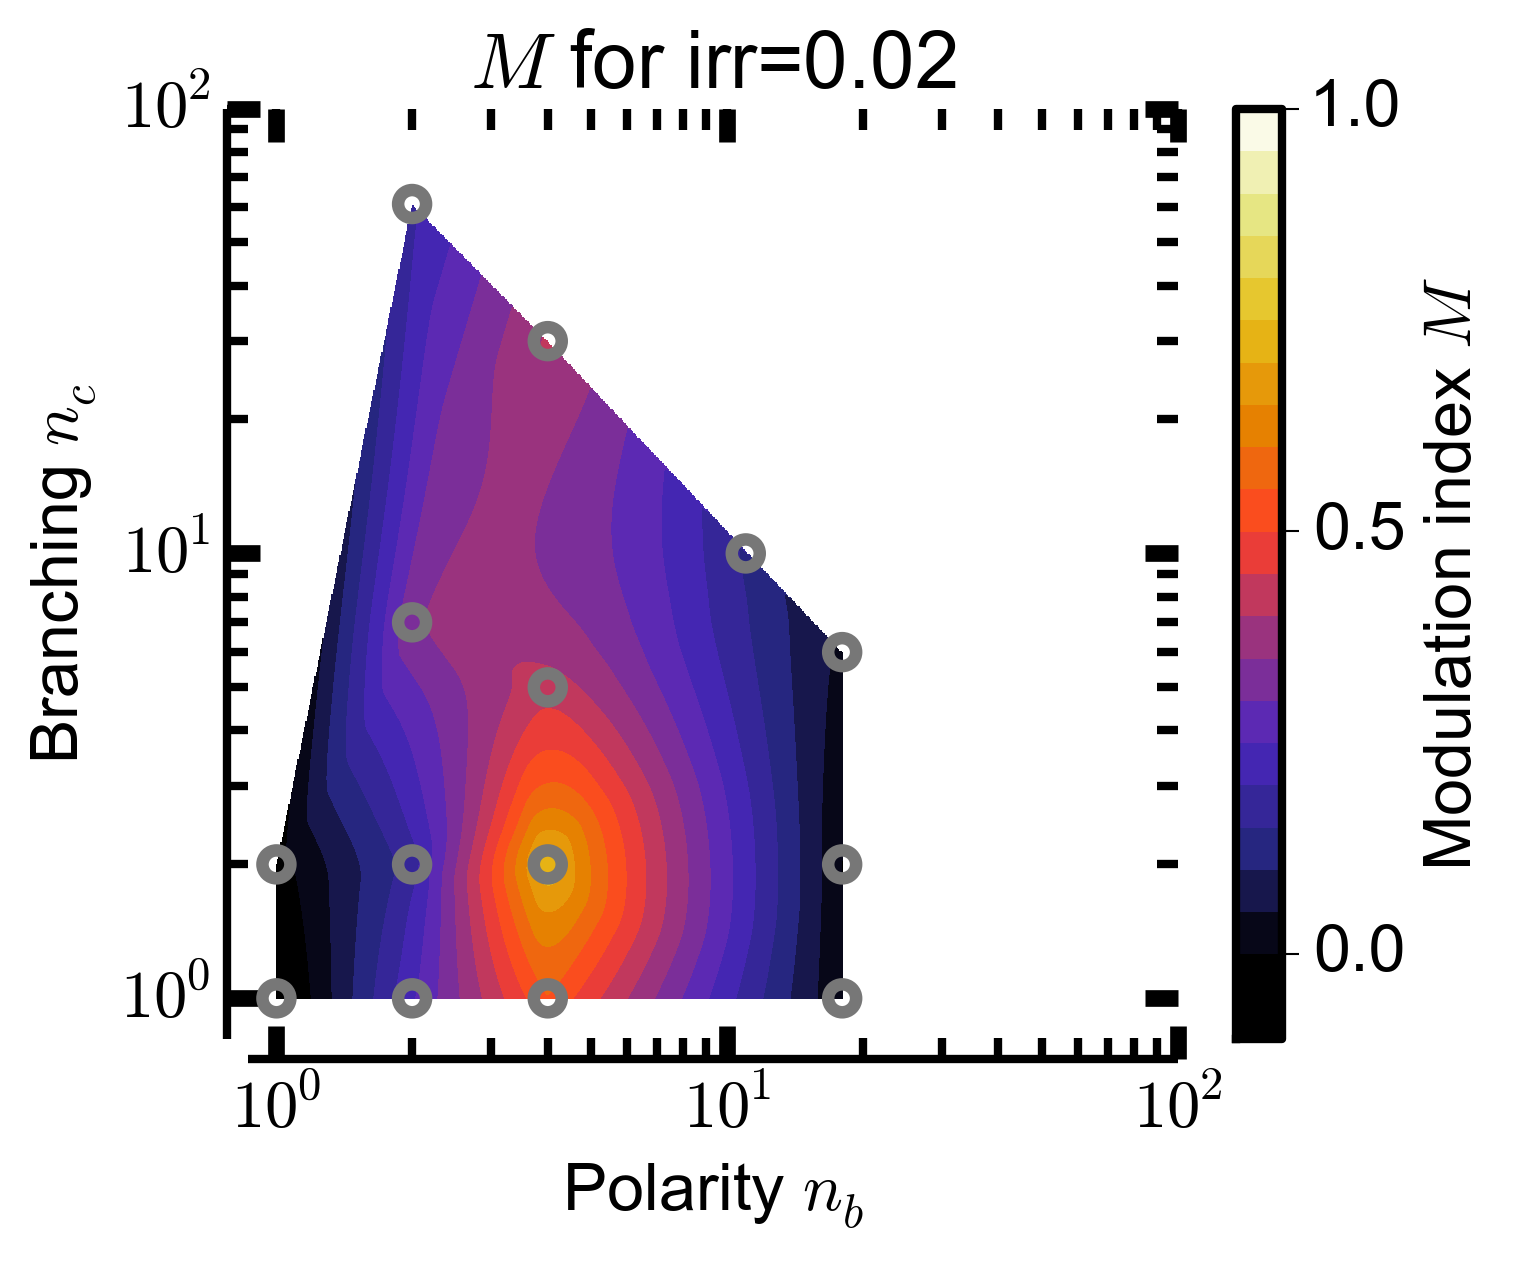

top
right
bottom
left


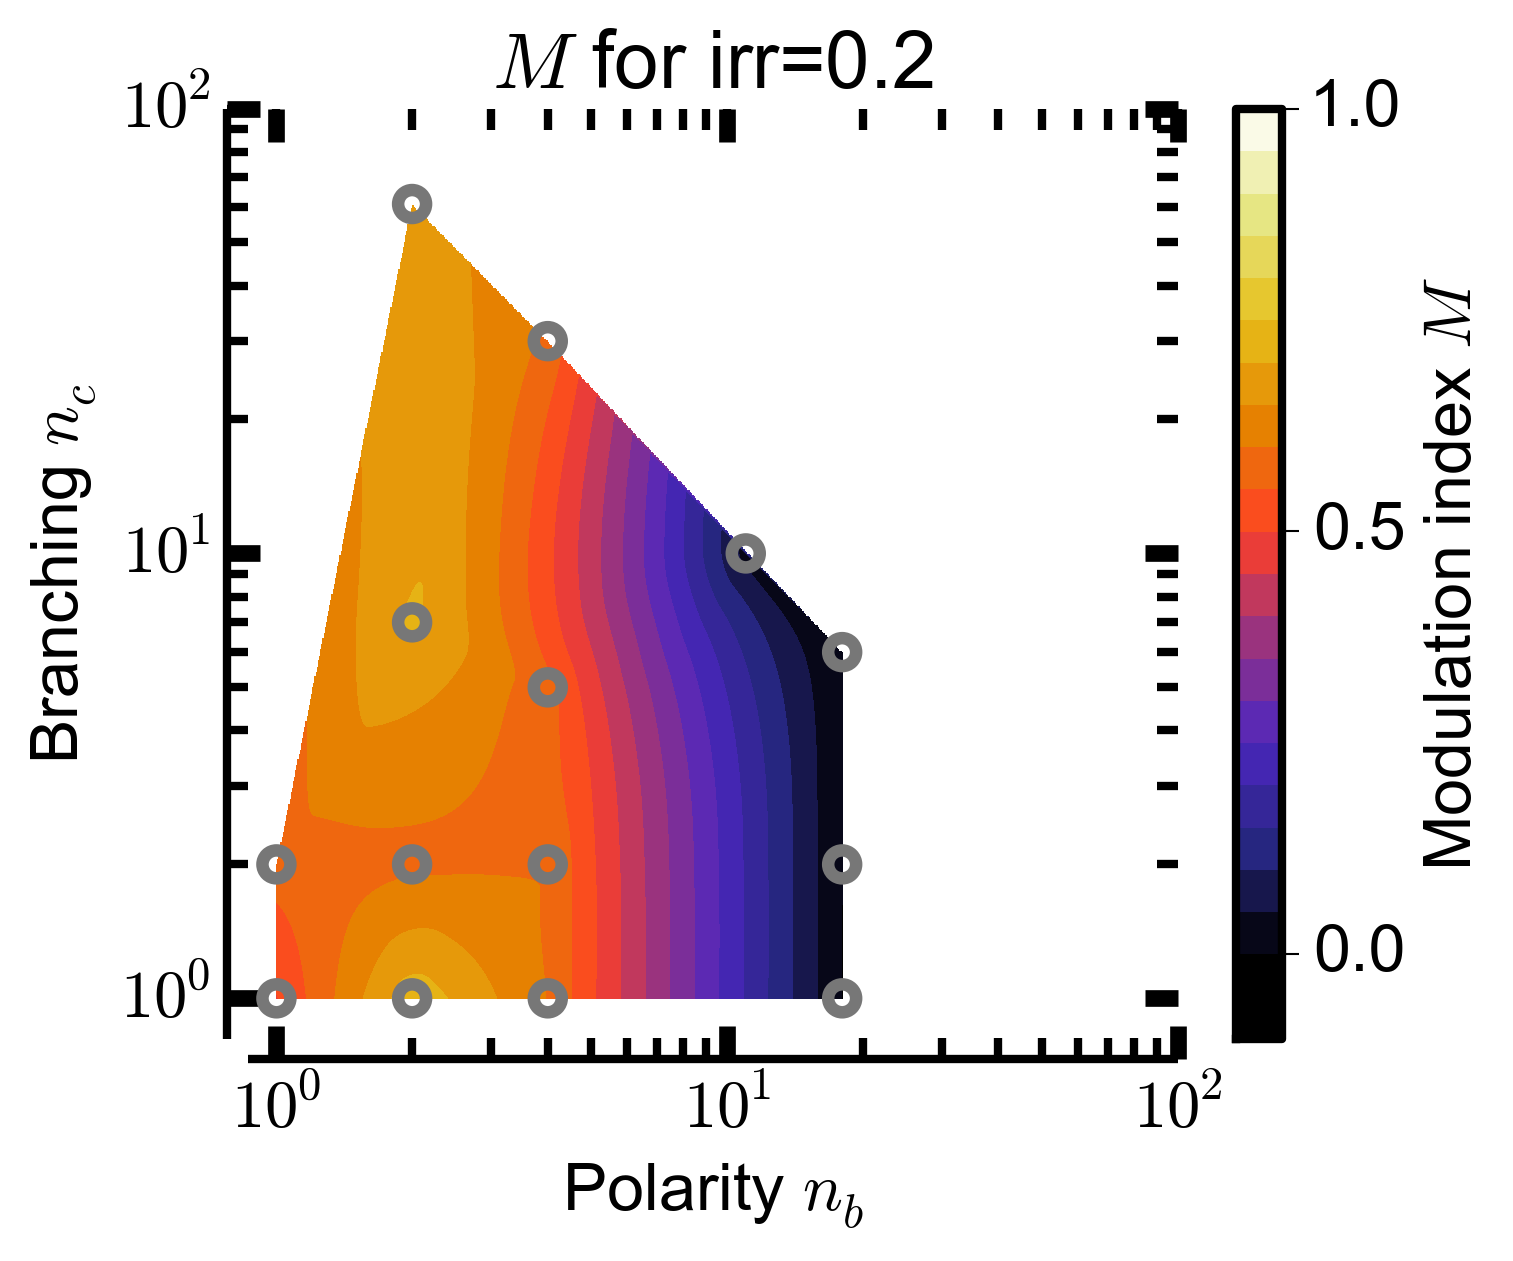

In [364]:
from matplotlib.mlab import griddata
#print trees
#print MI[trees[0]]
#print MI_vals
trees = [(1,1,124),(1,2,7),(2,2,6),(2,7,3),(2,1,62),(2,61,2),(4,5,3),(4,2,5),(4,30,2),(4,1,31),
         (11,10,2),(18,1,7),(18,2,3),(18,6,2)]

MI_vals = [MI[t] for t in trees]
tree_array = np.asarray(trees)
MI_array = np.asarray(MI_vals)
#print MI_array
xs = np.log10(tree_array[:,0])
ys = np.log10(tree_array[:,1])
#xs = tree_array[:,0]
#ys = tree_array[:,1]
ax_v = [1.,10.,100.]
ax_labels = ["$10^{%g}$"%np.log10(v) for v in ax_v]
ax_values = np.log10(ax_v)
minor_ax_values = np.log10( [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])


#ws = np.log10(tree_array[:,2])
#print xs
#print ys
#print ws

for (i,irr) in enumerate(expAbstract_light['irrs']):
    ws = MI_array[:,i]
    #print ws
    fig = plot_scanImage(xs,ys,ws,irr,xlabel='Polarity $n_b$',ylabel='Branching $n_c$',axislabels=ax_labels,axisvalues=ax_values,minor_ax=minor_ax_values)    
    plt.savefig('Fig1_scanM_trees_irr%.3f_test.png'%irr)
    plt.savefig('Fig1_scanM_trees_irr%.3f_test.svg'%irr)
    plt.show()


# Figure 2: L5PC neuron

Relevant experiments:

* 130709_increasing_uneq_irradiance_factor_somacurr (iclamp at soma)
* 130710_distalcurr_unequal_irradiance (iclamp at distal)
* 140723_L5PC_basal_irr (in vivo)
* 130711_illumination_unequal_irradiance (opsin only)
* 140616_replay_input_apic (replay, also used in low-level, in vivo)
* 1505?? (replay traces, input to both apic and basal)

In [57]:
#### plot shape


In [539]:
%%capture
# plot firing traces
#plot vm traces for freqs = 0Hz /Ia = 0A
reload(run_analysis)


expL5PC_light = {'filebase': '140723_L5PC_basal_irr_ChRonly',
                'light_on': 1050,
                'light_dur': 1000,
                'tstart':750,
                'tstop': 2500,
                'scalebar': True,
                'scalesizex':200,
                'scalesizey': 20,
                'ymin':-168,
                'figsize':(6,2),
                'factors': [0.125,0.25,0.5,1.,2.,4.,8.],#,4.,8.] ,
                'irrs': [1.] } #np.arange(0.5,5.1,0.5)} # [0.01,0.02,0.001,0.002]

# plot in vitro
description = ['whole','whole']
for irr in expL5PC_light['irrs']:
    exp_descript = ['irr%.3f_'%irr+'factor%.2f_I0.00_stimloc_stim0_iPhotoRec_'+'NpHR_%s_ChR_%s'%(description[1],description[0])]
    exp_labels = ['%.2f'%f for f in expL5PC_light['factors']]
    #af = run_exp(expL5PC_light['filebase'],exp_descript,exp_labels,expL5PC_light['factors'],convert_expData(expL5PC_light))
    af = plot_experiment(expL5PC_light['filebase'],exp_descript,exp_labels,expL5PC_light['factors'],convert_expData(expL5PC_light));
    af.update_cmap(9)
    af.submenu_plot(1,'Fig2_L5PC_Iclamp1_traces_irr%.3f'%irr,**expL5PC_light)

    
# and again for in vivo values    
expL5PC_light['factors'] = [0.001,0.125,0.25,0.5,0.75,1.]
expL5PC_light['irrs'] =  [0.002]
expL5PC_light['scalesizey'] = 5
expL5PC_light['ymin'] = -86
description = ['whole','whole']
for irr in expL5PC_light['irrs']:
    exp_descript = ['irr%.3f_'%irr+'factor%.2f_I0.00_stimloc_stim0_iPhotoRec_'+'NpHR_%s_ChR_%s'%(description[1],description[0])]
    exp_labels = ['%.2f'%f for f in expL5PC_light['factors']]
    #af = run_exp(expL5PC_light['filebase'],exp_descript,exp_labels,expL5PC_light['factors'],convert_expData(expL5PC_light))
    af = plot_experiment(expL5PC_light['filebase'],exp_descript,exp_labels,expL5PC_light['factors'],convert_expData(expL5PC_light));
    af.update_cmap(9)
    af.submenu_plot(1,'Fig2_L5PC_Iclamp2_traces_irr%.3f'%irr,**expL5PC_light)


In [63]:
"""
%%capture
# plot firing traces
#plot vm traces for freqs = 0Hz
reload(run_analysis)

expL5PC_light = {'filebase': '130711_illumination_uneq_irradiance',
                'light_on': 700,
                'light_dur': 1000,
                'tstop': 2500,
                'current_amps': np.arange(-2.,2.01,0.1),
                'factors': [0.125,0.25,0.5,1.,2.,4.,8.] ,
                'irrs': [0.02,0.2]} #np.arange(0.5,5.1,0.5)}

# plot in vitro
description = ['whole','whole']
for irr in expL5PC_light['irrs']:
    exp_descript = ['_irr%.1f_'%irr+'factor%.2f_'+'NpHR_%s_ChR_%s'%(description[1],description[0])]
    exp_labels = ['%.2f'%f for f in expL5PC_light['factors']]
    af = plot_experiment(expL5PC_light['filebase'],exp_descript,exp_labels,expL5PC_light['factors'],convert_expData(expL5PC_light));
   
    af.update_cmap(9)
    af.submenu_plot(1,'Fig2_L5PC_Iclamp_traces_irr%.3f'%irr)
"""


"\n%%capture\n# plot firing traces\n#plot vm traces for freqs = 0Hz\nreload(run_analysis)\n\nexpL5PC_light = {'filebase': '130711_illumination_uneq_irradiance',\n                'light_on': 700,\n                'light_dur': 1000,\n                'tstop': 2500,\n                'current_amps': np.arange(-2.,2.01,0.1),\n                'factors': [0.125,0.25,0.5,1.,2.,4.,8.] ,\n                'irrs': [0.02,0.2]} #np.arange(0.5,5.1,0.5)}\n\n# plot in vitro\ndescription = ['whole','whole']\nfor irr in expL5PC_light['irrs']:\n    exp_descript = ['_irr%.1f_'%irr+'factor%.2f_'+'NpHR_%s_ChR_%s'%(description[1],description[0])]\n    exp_labels = ['%.2f'%f for f in expL5PC_light['factors']]\n    af = plot_experiment(expL5PC_light['filebase'],exp_descript,exp_labels,expL5PC_light['factors'],convert_expData(expL5PC_light));\n   \n    af.update_cmap(9)\n    af.submenu_plot(1,'Fig2_L5PC_Iclamp_traces_irr%.3f'%irr)\n"

In [545]:
%%capture
# plot in vitro, soma injection
reload(run_analysis)
expL5PC_vitroSoma = {'filebase': '130709_increasing_uneq_irradiance_factor_somacurr',
                'light_on': 700,
                'light_dur': 1000,
                'tstop': 2500,
                'current_amps': np.arange(-2.,2.01,0.1),
                'factors': [0.125,0.25,0.5,1.,2.,4.,8.] ,
                'irrs': [1.0],
                'ymax' :25,
                'ymin' : -2,
                'xmin' : -2.1}
description = ['whole','whole']
irr= expL5PC_vitroSoma['irrs'][0]
exp_descript = ['_irr%.1f'%(irr)+'_factor%.2f'%(f)+'_Isoma%.1f_'+'NpHR_%s_ChR_%s'%(description[1],description[0]) for f in expL5PC_vitroSoma['factors']]
exp_labels = ['%g'%f for f in expL5PC_vitroSoma['factors']]
af = plot_experiment(expL5PC_vitroSoma['filebase'],exp_descript,exp_labels,expL5PC_vitroSoma['current_amps'],convert_expData(expL5PC_vitroSoma));
af.update_cmap(9)
af.submenu_plot(5, 'Fig2_L5PC_vitroSoma_'+expL5PC_vitroSoma['filebase']+'FI_gain_irr%.1f_varyFactor_exp%s%s_'%(irr,description[0],description[1]),**expL5PC_vitroSoma)

In [86]:
%%capture
reload(run_analysis)
# plot in vitro, apic injection

# NB: Distal point = 620 from soma

# NOTE: there was a FU when naming this experiment, so the generating script is: 130710_distalcurrent
# BUT the expbase is 130710_increasing_uneq_irradiance_factor_somacurr
expL5PC_vitroDistal = {'filebase': '130710_increasing_uneq_irradiance_factor_somacurr',
                'light_on': 700,
                'light_dur': 1000,
                'tstop': 2500,
                'current_amps': np.arange(-2.,2.01,0.1),
                'factors': [0.125,0.25,0.5,1.,2.,4.,8.] ,
                'ymax' :22,
                'ymin' : -2,
                'xmin' : -2.1,
                'irrs': [1.0]}
description = ['whole','whole']
irr= expL5PC_vitroDistal['irrs'][0]
exp_descript = ['_irr%.1f'%(irr)+'_factor%.2f'%(f)+'_Idist%.1f_'+'NpHR_%s_ChR_%s'%(description[1],description[0]) for f in expL5PC_vitroDistal['factors']]
exp_labels = ['%g'%f for f in expL5PC_vitroDistal['factors']]
af = plot_experiment(expL5PC_vitroDistal['filebase'],exp_descript,exp_labels,expL5PC_vitroDistal['current_amps'],convert_expData(expL5PC_vitroDistal));
af.update_cmap(9)
af.submenu_plot(5, 'Fig2_L5PC_vitroDistal_'+expL5PC_vitroDistal['filebase']+'FI_gain_irr%.1f_varyFactor_exp%s%s_'%(irr,description[0],description[1]),**expL5PC_vitroDistal)

In [570]:
%%capture
# plot in vivo

L5PCdata = {'filebase': '140723_L5PC_basal_irr_ChRonly',
                'light_on': 1050,
                'light_dur': 1000,
                'tstop': 2100,
                'freqs': range(2,15,2)+range(15,151,5),
                'Js':[2.],
                'nsite_range': [80],
                'factors': [0.001,0.125,0.25,0.5,0.75,1.] ,
                'irrs': [0.002]}

description = ['whole','whole']

for irr in L5PCdata['irrs']:
    exp_descript = ['irr%.3f_'%irr+'factor%.2f_'%f+'freq%g'+'_J%g_nsites%g'%(L5PCdata['Js'][0],L5PCdata['nsite_range'][0])+'_NpHR_%s_ChR_%s'%(description[1],description[0]) for f in L5PCdata['factors']]
    exp_labels = ['%.2f'%f for f in L5PCdata['factors']]
    af = plot_experiment(L5PCdata['filebase'],exp_descript,exp_labels,L5PCdata['freqs'],convert_expData(L5PCdata));
    af.update_cmap(9)
    af.submenu_plot(10, 'Fig2_L5PC_vivo_'+L5PCdata['filebase']+'FI_gain_irr%.1f_varyFactor_exp%s%s_'%(irr,description[0],description[1]))

In [543]:
%%capture
# plot illumination only



expL5PC_light = {'filebase': '130711_illumination_uneq_irradiance',
                'light_on': 700,
                'light_dur': 1000,
                'tstop': 2500,
                'ymax' :22,
                'ymin' : -2,
                'xmin' : -0.1,
                'current_amps': np.arange(-2.,2.01,0.1),
                'factors': [0.125,0.25,0.5,1.,2.,4.,8.] ,
                'irrs': np.arange(0,5.1,0.5)}

explist = [['whole','whole'],['apical','apical']] 
for (i,expli) in enumerate(explist):
    exp_descript = ['_irr%.1f'+'_factor%.2f'%(factor)+'_NpHR_%s_ChR_%s'%(expli[1],expli[0]) for factor in expL5PC_light['factors']]
    exp_labels = ['%g'%f for f in expL5PC_light['factors']]
    af = plot_experiment(expL5PC_light['filebase'],exp_descript,exp_labels,expL5PC_light['irrs'],convert_expData(expL5PC_light));
    af.update_cmap(9)
    if i==0:
        #continue
        af.submenu_plot(5, 'Fig2_L5PC_light_'+expL5PC_light['filebase']+'FI_gain_varyFactor_exp%s%s_'%(expli[0],expli[1]),**expL5PC_light)
    else:
        af.submenu_plot(5, 'Fig5_L5PC_light_partial'+expL5PC_light['filebase']+'FI_gain_varyFactor_exp%s%s_'%(expli[0],expli[1]),**expL5PC_light)
        


# Figure 3: Stellate

Relevant experiments:

* 140408_scan_SHstell (in vitro, and in vivo)

In [57]:
## Common data
stell_data = {'filebase': '140408_scan_SHstell',
               'light_on': 700,
                'light_dur': 1000,
                'tstop': 2700,
                'current_amps': np.arange(-1.,3.1,0.2),
                'freqs': range(10,201,10),
                'Js':[2.],
                'nsite_range': [40],
                'stimlocs': ['stim2','stim3'],
                #'factors': [ 0.0625, 0.125,0.25,0.375,0.5,0.75,1.,1.5,2.],
                'factors': [0.0625,0.125, 0.25,0.375,0.5,0.75,1.,1.5,2.],
                'irrs': [0.007,0.012]}

In [50]:
# plot shape

# plot - find location of stim2 = select_section_posn_bydistance for [100.3,100.4]
# while stim3 = select_section_posn_bydistance for [304,305]

# see file: diary/150804_plotStellate.py

In [68]:
%%capture
#plot vm traces for freqs = 0Hz
reload(run_analysis)

stell_data = {'filebase': '140408_scan_SHstell',
               'light_on': 700,
                'light_dur': 1000,
                'tstop': 2700,
                'current_amps': np.arange(-1.,3.1,0.2),
                'freqs': range(10,201,10),
                'Js':[1.],
                'nsite_range': [40],
                'stimlocs': ['stim2','stim3'],
                'tstart':500,
                'tstop': 2000,
                'scalebar': True,
                'scalesizex':200,
                'scalesizey': 50,
                'ymin':-155,
                'ymax': -25,
                'figsize':(6,2),
                'factors': [ 0.0625, 0.125,0.25,0.375,0.5,0.75,1.,2.,4.,8.],
                'irrs': [0.007]}

# plot in vitro
description = ['whole','whole']
stimloc = stell_data['stimlocs'][0]
for irr in stell_data['irrs']:
    exp_descript = ['irr%.3f_'%irr+'factor%.2f_'+'freq0'+'_J%g'%(1.)+'_NpHR_%s_ChR_%s'%(description[1],description[0])]
    exp_labels = ['%.3f'%f for f in stell_data['factors']]
    af = plot_experiment(stell_data['filebase'],exp_descript,exp_labels,stell_data['factors'],convert_expData(stell_data));
   
    af.update_cmap(9)
    af.submenu_plot(1,'Fig3_Iclamp_traces_irr%.3f'%irr,**stell_data)





In [9]:
%%capture
reload(run_analysis)
# plot in vitro
description = ['whole','whole']
stimloc = stell_data['stimlocs'][0]
for irr in stell_data['irrs']:
    exp_descript = ['irr%.3f_'%irr+'factor%.2f_'%f+'I%.2f'+'_stimloc_%s'%(stimloc)+'_NpHR_%s_ChR_%s'%(description[1],description[0]) for f in stell_data['factors']]
    exp_labels = ['%.3f'%f for f in stell_data['factors']]
    af = plot_experiment(stell_data['filebase'],exp_descript,exp_labels,stell_data['current_amps'],convert_expData(stell_data));
    af.update_cmap(9)
    af.submenu_plot(5, 'Fig3_stellate_vitro_'+stell_data['filebase']+'FI_gain_irr%.3f_varyFactor_exp%s%s_'%(irr,description[0],description[1]))
    #af.submenu_plot(0, 'Fig3_stellate_vitro_'+stell_data['filebase']+'FI_gain_irr%.3f_varyFactor_exp%s%s_'%(irr,description[0],description[1]))
    

In [52]:
for irr in stell_data['irrs']:%%capture
# plot in vivo
description = ['whole','whole']
for irr in stell_data['irrs']:
    exp_descript = ['irr%.3f_'%irr+'factor%.2f_'%f+'freq%g'+'_J%g'%(2.)+'_NpHR_%s_ChR_%s'%(description[1],description[0]) for f in stell_data['factors']]
    exp_labels = ['%.3f'%f for f in stell_data['factors']]
    af = plot_experiment(stell_data['filebase'],exp_descript,exp_labels,stell_data['freqs'],convert_expData(stell_data));
    af.update_cmap(9)
    af.submenu_plot(5, 'Fig3_stellate_vivo_'+stell_data['filebase']+'FI_gain_irr%.3f_varyFactor_exp%s%s_'%(irr,description[0],description[1]))
    af.submenu_plot(10, 'Fig3_stellate_vivo_bg_'+stell_data['filebase']+'FI_gain_irr%.3f_varyFactor_exp%s%s_'%(irr,description[0],description[1]))


In [ ]:
# plot voltage traces

In [54]:
#irr
%%capture
# plot for multiple trials - in vivo:
basename = "150616_n50_stellate"
factors = [ 0.0625, 0.125,0.25,0.375,0.5,0.75,1.,1.5,2.]
for irr in stell_data['irrs']:
    instances = ["irr%.3f"%irr+"_factor%.2f"%factor+"_freq%g_J2_trial%s_NpHR_whole_ChR_whole" for factor in factors]
    variables = range(10,201,10)
    trials = range(5)
    trialLabels = ['%.2f'%f for f in factors]
    labels = ["freq%g"%f for f in variables]
    var_format = '%g'
    af = plot_trialSet(basename,instances,stell_data['freqs'],trials,trialLabels,labels,var_format)
    af.update_cmap(9)
    af.submenu_plot(10, 'Fig3_stellate_vivo_bg_trials'+'FIbg_gain_irr%.3f_varyFactor_trialled_invivo_exp%s%s_'%(irr,description[0],description[1])) 
   

In [541]:
%%capture
reload(run_analysis)
stell_data = {'light_on': 700+50,
                'light_dur': 1000-50,
                'tstop': 2700}
filebase ='140408_scan_SHstell'
#factors = [ 0.0625, 0.125,0.25,0.375,0.5,0.75,1.,1.5,2.]
factors = [0.125,0.25,0.375,0.5,0.75,1.,1.5,2.]
irrs = [ a*b for a in [0.01, 0.1] for b in [1,2,5]] + list(np.arange(1.,5.1,0.25)) 
irrs.sort()
# plot - illumination only
description = ['whole','whole']
exp_descript = ['irr%.3f_'+'factor%.2f_'%f+'illOnly'+'_NpHR_%s_ChR_%s'%(description[1],description[0]) for f in factors]
exp_labels = ['%.3f'%f for f in factors]
af = plot_experiment(filebase,exp_descript,exp_labels,irrs,convert_expData(stell_data));
af.update_cmap(9)
af.submenu_plot(5, 'Fig3_stellate_ill_'+filebase+'FI_gain_varyIrrFactor_exp%s%s_'%(description[0],description[1]))
af.submenu_plot(0, 'Fig3_stellate_ill_orig_'+filebase+'FI_gain_varyIrrFactor_exp%s%s_'%(description[0],description[1]))
   

# Figure 4: Partial illumination in abstract neurons

Relevant experiments:

* ...?

In [ ]:
# figure for partial illumination illustration

In [ ]:
# plot voltage attenuation along one trace when one branch is unilluminated

In [ ]:


# plot IF response for partial illumination when one-three branches are unilluminated


In [166]:
%%capture
# plot MI as IF response varies 
reload(run_analysis)

expbase = '151104_retestAbstractPassive'
trees = [(4,2,5)] 
factors = [0.25,0.5,0.75,1.,1.25,1.5,2.,4.]

freqs = range(10,100,10) 
JS_LOOKUP = { (4,2,5) : 2.0} #OK

expAbstract_light = {'filebase': '151104_retestAbstractPassive',
                'light_on': 1000+buffer,
                'light_dur': 1500,
                'tstart':buffer,
                'tstop': 3500,
                'scalebar': True,
                'scalesizex':100,
                'scalesizey': 5,
                'ymin':-5,
                'xmin':-1,
                'ymax':80,
                'figsize':(6,4),
                'factors' :  factors,
                'freqs' : freqs,
                'irrs' : [0.02] }
MI_partial = []
MC = []
MH = []
for tree in trees:
    J = JS_LOOKUP[tree]
    
    for irr in expAbstract_light['irrs']:
        for ndend in range(1,tree[0]+1):
             
            exp = 'partialSame_%gDends'%ndend
            af = run_analysis.AnalyticFrame()

            exp_comp_list = [['irr%.3f'%irr+'_factor%.2f'%(factor)+'_nb%g_ns%g_nl%g_'%(tree[0],tree[1],tree[2])+'spikes%g'+'_loc%s_J%.1f'%(tree[2]-1,J)+'_partial_nDend%g'%ndend+'_NpHR_%s_ChR_%s'%(exp,exp),'%g'%factor] for factor in factors]
            print exp_comp_list

            expss = [ec[0] for ec in exp_comp_list]
            explabels = [ec[1] for ec in exp_comp_list]
            af.populate_expset(expbase,expss,explabels,expAbstract_light['freqs'])

            af.submenu_load()
            """
            af._calculateModulationIndex(ChRlabel=explabels[0],NpHRlabel=explabels[-1],recalc=True)
            af.submenu_save()
            af.submenu_print()
            """
            mChR,mHalo,yChR,yHalo = af._calculateModulationIndex(ChRlabel=explabels[0],NpHRlabel=explabels[-1])
            MC.append(mChR)
            MH.append(mHalo)
            # YC[tree].append(yChR)
            # YH[tree].append(yHalo)
            # convert to degrees
            #print mChR
            mi_ch2 = math.atan(mChR)
            mi_halo = math.atan(mHalo)
            MI_partial.append(mi_ch2-mi_halo)
            

In [188]:
%%capture
print MI_partial
pylab.figure(figsize=(4,5))
pylab.plot(range(1,tree[0]+1),MI_partial,c='#555555',marker='s',mew=0,ms=10)
turn_off_border(pylab.gca())
pylab.xticks(range(1,tree[0]+1))
pylab.xlim(0.5,4.5)
pylab.xlabel('Number of dendrites illuminated')
pylab.ylabel('$M$')
pylab.savefig('Fig5_partialIllumination_successiveDendrites.png')
pylab.savefig('Fig5_partialIllumination_successiveDendrites.eps')

# Figure 5: Partial and graded illumination in L5PC

Relevant experiments:

* partial illumination: 130710_increasing_uneq_irradiance_factor_somacurr
* graded illumination:  150324_partialIllumination_dualOpsin

In [ ]:
figure# figure for partial illumination illustration

In [72]:
# plot IF response response when only apical dendrites are illuminated i.e. no driving current
# DONE: see Figure 2, illumination only

In [542]:
%%capture
#130710_increasing_uneq_irradiance_factor_somacurr130710_increasing_uneq_irradiance_factor_somacurr
# plot in vitro, apic injection

# NOTE: there was a FU when naming this experiment, so the generating script is: 130710_distalcurrent
# BUT the expbase is 130710_increasing_uneq_irradiance_factor_somacurr
expL5PC_vitroDistal = {'filebase': '130710_increasing_uneq_irradiance_factor_somacurr',
                'light_on': 700,
                'light_dur': 1000,
                'tstop': 2500,
                'current_amps': np.arange(-2.,2.01,0.1),
                'factors': [0.125,0.25,0.5,1.,2.,4.,8.] ,
                'ymax' :22,
                'irrs': [1.0]}
description = ['apical','apical']
irr= expL5PC_vitroDistal['irrs'][0]
exp_descript = ['_irr%.1f'%(irr)+'_factor%.2f'%(f)+'_Idist%.1f_'+'NpHR_%s_ChR_%s'%(description[1],description[0]) for f in expL5PC_vitroDistal['factors']]
exp_labels = ['%g'%f for f in expL5PC_vitroDistal['factors']]
af = plot_experiment(expL5PC_vitroDistal['filebase'],exp_descript,exp_labels,expL5PC_vitroDistal['current_amps'],convert_expData(expL5PC_vitroDistal));
af.update_cmap(9)
af.submenu_plot(5, 'Fig5_L5PC_vitroDistalApical_'+expL5PC_vitroDistal['filebase']+'FI_gain_irr%.1f_varyFactor_exp%s%s_'%(irr,description[0],description[1]),**expL5PC_vitroDistal)

In [544]:
%%capture
#150324_partialIllumination_dualOpsin150324_partialIllumination_dualOpsin150324_partialIllumination_dualOpsin
# plot trend --> creates 9 plots for irr and factors for graded illumination
expbase = '150324_partialIllumination_dualOpsin'
reload(run_analysis)
tstop = 1500
light_dur = 1100
light_on = 200
irrs = [0.01,0.02,0.05]
factors = [0.1,0.2,0.5]
gradients = np.arange(0.0,0.00101,0.0001)
#gradients = np.arange(0.0,0.00101,0.0002)
for irr in irrs:
    for fac in factors:
        af = run_analysis.AnalyticFrame()
        af.update_params({'label_format':'_irr%.2f_factor%g_ChRgrad%.4f_NpHRgrad%.4f_NpHR_whole_ChR_whole'})
        af.update_params({'tstart':light_on,'tstop':light_on+light_dur,
                              'tstart_bg': 0,'tstop_bg':light_on,
                              'tstart_post':light_on+light_dur,'tstop_post':tstop})
        
        exp_comp_list = [['_irr%.2f'%irr+'_factor%g'%fac+'_ChRgrad%.4f'+'_NpHRgrad%.4f_NpHR_whole_ChR_whole','..']]
        expss = [ec[0] for ec in exp_comp_list]
        explabels = [ec[1] for ec in exp_comp_list]
        af.populate_expset(expbase,expss,explabels, [gradients,gradients])
        af.submenu_load()
        af.submenu_print()
        labels = ['%.1f'%(g*1000) for g in gradients]
        af.update_cmap(12)
        af.submenu_plot(11, 'Fig5_2Dtrend_FI_gain_irr%.2f_factor%g_varyGradients'%(irr,fac),axestitles=['NpHR gradient (a.u.)','ChR2 gradient (a.u.)'],axeslabels=[labels,labels],plottitle='Graded illumination (irr=%.2f, E:I opsin factor=%.1f)'%(irr,fac))
        

## Figure 6: Subthreshold / smooth transition

Relevant experiments:

* 140616_replay_input_apic (replay traces, in vivo)
* 1505?? (replay traces, input to both apic and basal)

In [88]:
reload(run_analysis)

<module 'run_analysis' from '/home/sjarvis1/workspace/co_optogenetics/src/run_analysis.pyc'>

In [ ]:
# For: 
# * original plot <-- experiments/140616_replay_input_apic/dat/140616_replay_input_apicirr0.000_factor0.12_spikes80_J0.5_cellL5PC_inh-0.05_freqfactor1_shuffle5_stimpoisson_NpHR_none_ChR_none_v.dat
# * high and low level illumination plots
# see diary/151106_plotVmTrace.ipynb 


In [408]:
%%capture
# FF and CVISI
# 140616_replay_input_apic.py
light_on = 2100
light_dur = 1000
tstop = 4000
buff = 100 # buffer

ffCollection = {}
frCollection = {}
cvCollection = {}


exp_fixedInput = {
    'filebase': '140616_replay_input_apic',
    'light_on':2000,
    'light_dur': 1000,
    'tstop': 4000,
    'factors': [0.125,0.25,0.5,1.,2.,4.,8.],
    #'irrs': [0.,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]+[0.5]+range(1,6),
    #'irrs': [ a*b for a in [0.001,0.01, 0.1, 1.] for b in [1,2,5]], #range(1,6),
    'irrs': [ a*b for a in [0.001,0.01, 0.1,1.] for b in [2]], #range(1,6),
    'freqs': [80,100,120,160,220],
    'J': 0.5,
    'syn_factor': -0.05,
}

for freq in exp_fixedInput['freqs']:
    af = run_analysis.AnalyticFrame()
    af.update_params({'tstart':light_on+buff,'tstop':light_on+light_dur,
                              'tstart_bg': buff,'tstop_bg':light_on,
                              'tstart_post':light_on+light_dur,'tstop_post':tstop})

    af.update_cmap(9)
    description = 'irr%.3f_factor%.2f'+'_spikes%g'%freq+'_J0.5_cellL5PC_inh-0.05_freqfactor1_shuffle5_stimpoisson_NpHR_whole_ChR_whole'#%(irr,factor)
    exp_comp_list = [[description,'']]
    expss = [ec[0] for ec in exp_comp_list]
    explabels = [ec[1] for ec in exp_comp_list]
    af.populate_expset(exp_fixedInput['filebase'],expss,explabels, [exp_fixedInput['irrs'], exp_fixedInput['factors']]) 

    #af.submenu_extractSpikes()
    #af.perform_analysis(['FI'],recalc=True)
    #af.perform_analysis(['isi'],recalc=True)
    
    #af.submenu_save()
    
    af.submenu_load()
    ffCollection[freq] = af.get_analysis_values('ff_isi')[0]
    cvCollection[freq] = af.get_analysis_values('cv_isi')[0]
    frCollection[freq] = af.get_analysis_values('FI')[0]
    
    

In [409]:
print ffCollection.keys()
print len(frCollection.values())
print len(cvCollection.keys())

[80, 120, 160, 100, 220]
5
5


In [410]:
n_factors = len(exp_fixedInput['factors'])
n_irrs = len(exp_fixedInput['irrs'])
print n_factors*n_irrs

28


In [411]:
%%capture
# calculate rate dependent values of CVISI and FF for background rates i.e. no illumination
light_on = 2100
light_dur = 1000
tstop = 4000
buff = 100 # buffer
exp_fixedInput = {
    'filebase': '140616_replay_input_apic',
    'light_on':0,
    'light_dur': 4000,
    'tstop': 4000,
    'factors': [0.125,0.25,0.5,1.,2.,4.,8.],
    'irrs': [ 0.0], 
    'freq': range(20,301,10),
    'J': 0.5,
    'syn_factor': -0.05,
    'ntrials': 10 #nshuffles
}


expParams = {'tstart':light_on+buff,'tstop':light_on+light_dur}
"""
    'tstart':buff,'tstop':tstop, # as we're only using this for intrinsic rates
                                         # discard the first 100ms to ignore simulation initialisation firing
                              'tstart_bg': 0,'tstop_bg':light_on,
                              'tstart_post':light_on+light_dur,'tstop_post':tstop}
"""
"""
for i in range(exp_fixedInput['ntrials']):
    af = run_analysis.AnalyticFrame()
    af.update_params(expParams)
      
    af.update_cmap(9)
    
    description = 'irr0.000_factor0.12_spikes%g_J0.5_cellL5PC_inh-0.05_freqfactor1_'+'shuffle%g_stimpoisson_NpHR_none_ChR_none'%i

    exp_comp_list = [[description,'']]
    expss = [ec[0] for ec in exp_comp_list]
    explabels = [ec[1] for ec in exp_comp_list]
    af.populate_expset(exp_fixedInput['filebase'],expss,explabels, exp_fixedInput['freq']) 
    af.submenu_extractSpikes()
    #af.perform_analysis(['FI'],recalc=True)
    af.perform_analysis(['isi'],recalc=True)

    
"""


# creates AF as trial set i.e. multiple trials    
instances = ['irr0.000_factor%.2f'%factor + '_spikes%g_J0.5_cellL5PC_inh-0.05_freqfactor1_shuffle%s_stimpoisson_NpHR_none_ChR_none' for factor in [0.125]]
variables = exp_fixedInput['freq']
trials = range(exp_fixedInput['ntrials'])
trialLabels = ['%.2f'%factor for factor in [0.125]]
labels = ["freq%g"%f for f in variables]
var_format = '%g'
af = plot_trialSet(exp_fixedInput['filebase'],instances,exp_fixedInput['freq'],trials,trialLabels,labels,var_format,exp_params=expParams)



In [412]:
%%capture
# code for when AF contains a TrialExperimentSet
af.perform_analysis(['isi'],recalc=True)
af.submenu_save()
af.submenu_load()
af.submenu_print()
ff_bg = af.get_analysis_values('ff_isi')
cv_bg = af.get_analysis_values('cv_isi')
fr_bg = af.get_analysis_values('FI')
fr_bg = np.array(fr_bg)
ff_bg = np.array(ff_bg)
cv_bg = np.array(cv_bg)

In [413]:
print ff_bg.shape[0]
print cv_bg.shape[0]
print fr_bg.shape[0]
#print ff_bg
#print cv_bg
#print fr_bg
#print fr_bg[0][:40]
#print fr_bg[0][40:]


# select values where fr > 0
cond = fr_bg>0
ff_bg = ff_bg[cond]
cv_bg = cv_bg[cond]
fr_bg = fr_bg[cond]
print ff_bg.shape[0]
print cv_bg.shape[0]
print fr_bg.shape[0]

1
1
1
250
250
250


In [416]:
%%capture
pylab.figure(figsize=(10,5))
pylab.scatter(fr_bg,ff_bg)
turn_off_border(pylab.gca()) 
pylab.figure(figsize=(10,5))
pylab.scatter(fr_bg,cv_bg)
turn_off_border(pylab.gca()) 

In [417]:
# Values for the example in the text i.e.

ff_example = 54.837978465289666
cv_example = 0.64109459085885934
fr_example = 7.435897435897436


In [418]:
from scipy.optimize import leastsq

def fitfunc(p, x):
    return p[0] + p[1] * (x ** p[2])
def errfunc(p, x, y):
    return y - fitfunc(p, x)

def fitCurve(xdata,ydata,ythreshold=0):
    
    qout,success = leastsq(errfunc, [max(ydata),-1,-0.5], args=(xdata, ydata),maxfev=3000)
    #print qout
    #print success
    
    ## calculate new x's and y's
    x_new = np.linspace(xdata[0], xdata[-1], 50)
    y_new = fitfunc(qout,x_new)
    
    # only return y>values
    x_new = x_new[y_new>=ythreshold]
    y_new = y_new[y_new>=ythreshold]
    return x_new,y_new



In [419]:
def preselect1(xs,ys,xthresh=6,ythresh=10,useAnd=False):
    ys = np.array(ys)
    xs = np.array(xs)
    #print xs
    #print ys
    if useAnd:
        cond = (ys >=ythresh) & (xs >= xthresh)
    else:
        cond = (ys >=ythresh) | (xs >= xthresh)
    print cond
    xs = xs[cond]
    ys = ys[cond]
    #print xs
    #print ys
    xs_sorted, ys_sorted = zip(*sorted(zip(xs, ys)))#, key=operator.itemgetter(0)))
    return xs_sorted,ys_sorted

def preselect(xs,ys,condGradient=1,condYIntercept=1,tmp=1,xthresh=6,ythresh=10,useAnd=False):
    ys = np.array(ys).flatten()
    xs = np.array(xs).flatten()
    #print xs
    #print ys
    cond = (ys+condGradient*xs > condYIntercept) 
    #print cond
    xs = xs[cond]
    ys = ys[cond]
    #print xs
    #print ys
    xs_sorted, ys_sorted = zip(*sorted(zip(xs, ys)))#, key=operator.itemgetter(0)))
    return xs_sorted,ys_sorted

def getValues(spiketrainColl,start,until):
    vals = []
    for v in spiketrainColl.values():
        vals.append(v[start:until])
    return vals

In [500]:
reload(run_analysis)

irr_labels = [ a*b for a in [0.001,0.01, 0.1,1.] for b in [2]] # reminder
irr_ticks = range(-3,1)

def get_index(irr_value,multiplier=2.):
    return np.log10(irr_value/multiplier)

import matplotlib as mpl
lspace = (0.25,0.9)
lspace = (-4,1) # the 
intensities =  np.linspace(lspace[0], lspace[1], n_irrs+2) #np.linspace(0.1, 0.9, n_irrs)
print intensities

#expPlot = ExperimentPlotter()
#expPlot.update_cmap_index(18)


cmap = pylab.cm.CMRmap
norm = mpl.colors.Normalize(vmin = intensities[0], vmax = intensities[-1], clip = False)
smap = cm.ScalarMappable(cmap=cmap,norm=norm)
#smap.set_array(intensities.T)
colorIrrs=[smap.to_rgba(intensity) for intensity in intensities[1:-1]]
print colorIrrs
print type(cmap)
print type(smap)
"""
cmap=cm.CMRmap
cmap = cmap.from_list('Custom cmap', colorIrrs, 4)
#myMap.set_over((1., 0., 0.,1.))
#myMap.set_under((0., 0., 1.,1.))
bounds = intensities
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
"""

[-4. -3. -2. -1.  0.  1.]
[(0.23999999999999999, 0.14999999999999999, 0.65000000000000002, 1.0), (0.67999999999999994, 0.21000000000000002, 0.42999999999999999, 1.0), (0.92000000000000004, 0.45000000000000001, 0.029999999999999999, 1.0), (0.90000000000000002, 0.81000000000000005, 0.26000000000000001, 1.0)]
<class 'matplotlib.colors.LinearSegmentedColormap'>
<type 'instance'>


"\ncmap=cm.CMRmap\ncmap = cmap.from_list('Custom cmap', colorIrrs, 4)\n#myMap.set_over((1., 0., 0.,1.))\n#myMap.set_under((0., 0., 1.,1.))\nbounds = intensities\nnorm = mpl.colors.BoundaryNorm(bounds, cmap.N)\n"

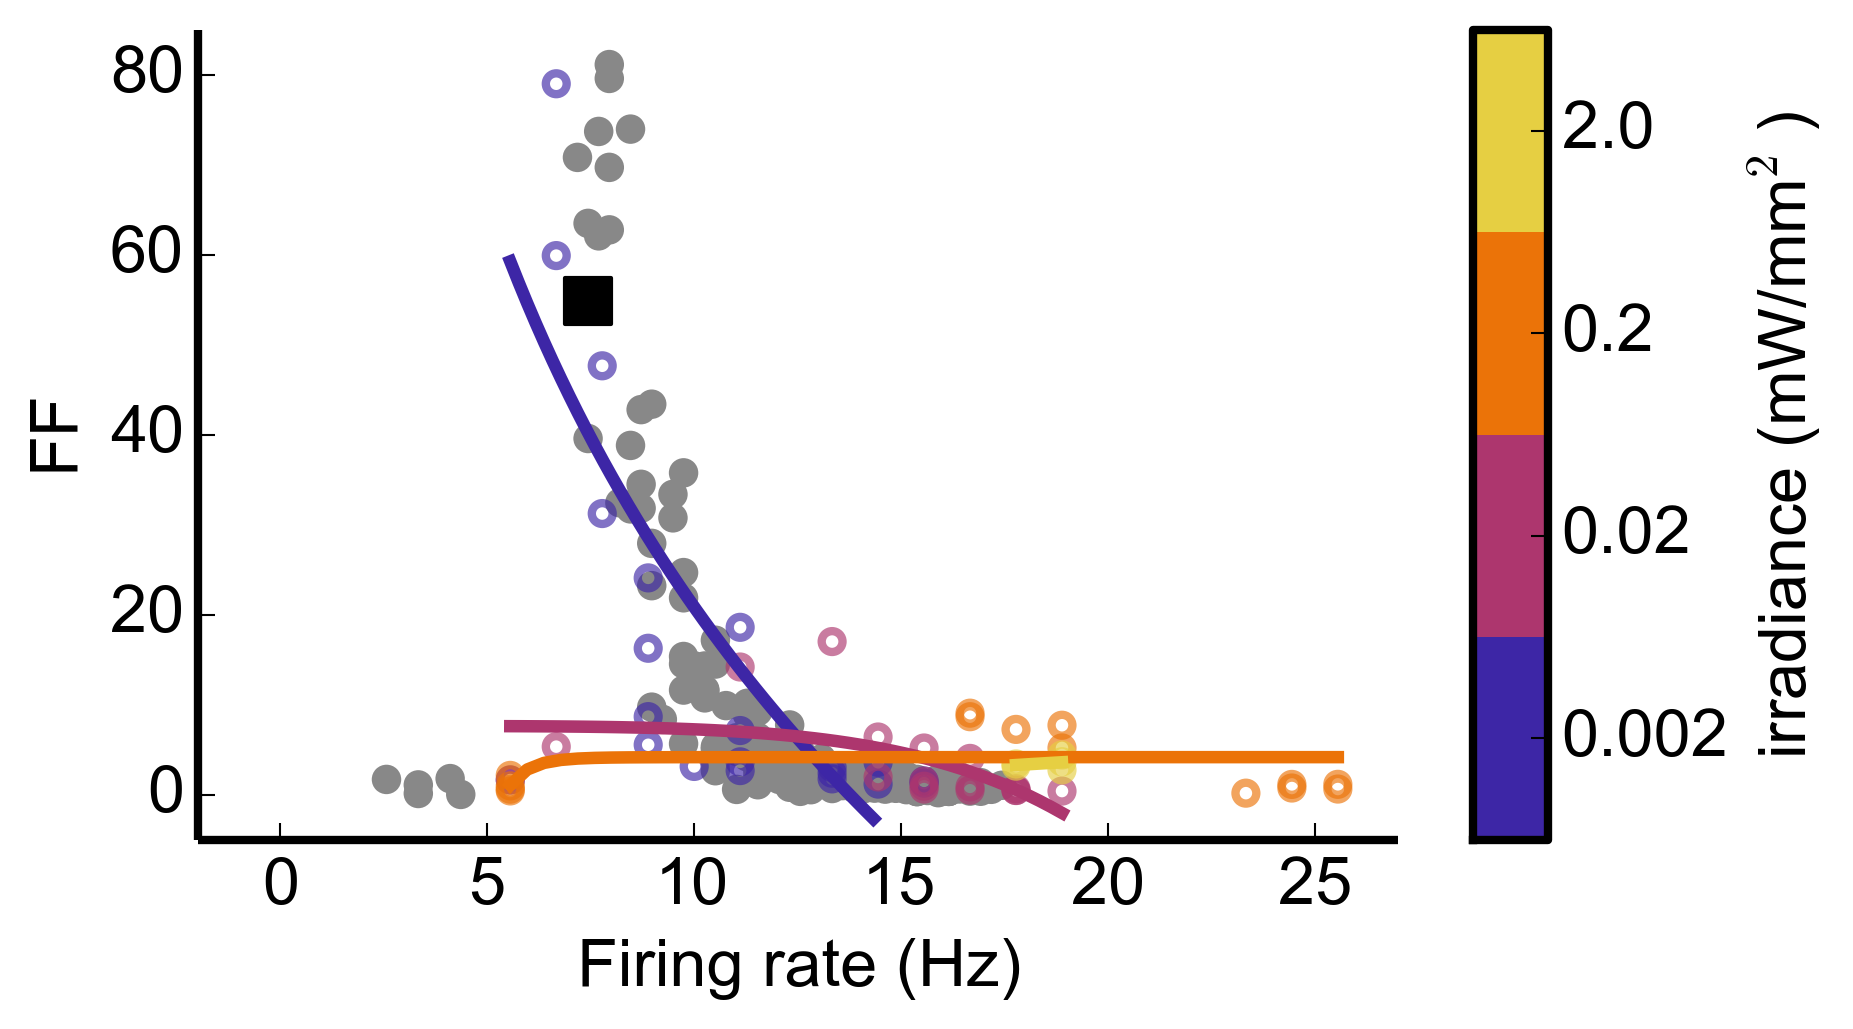

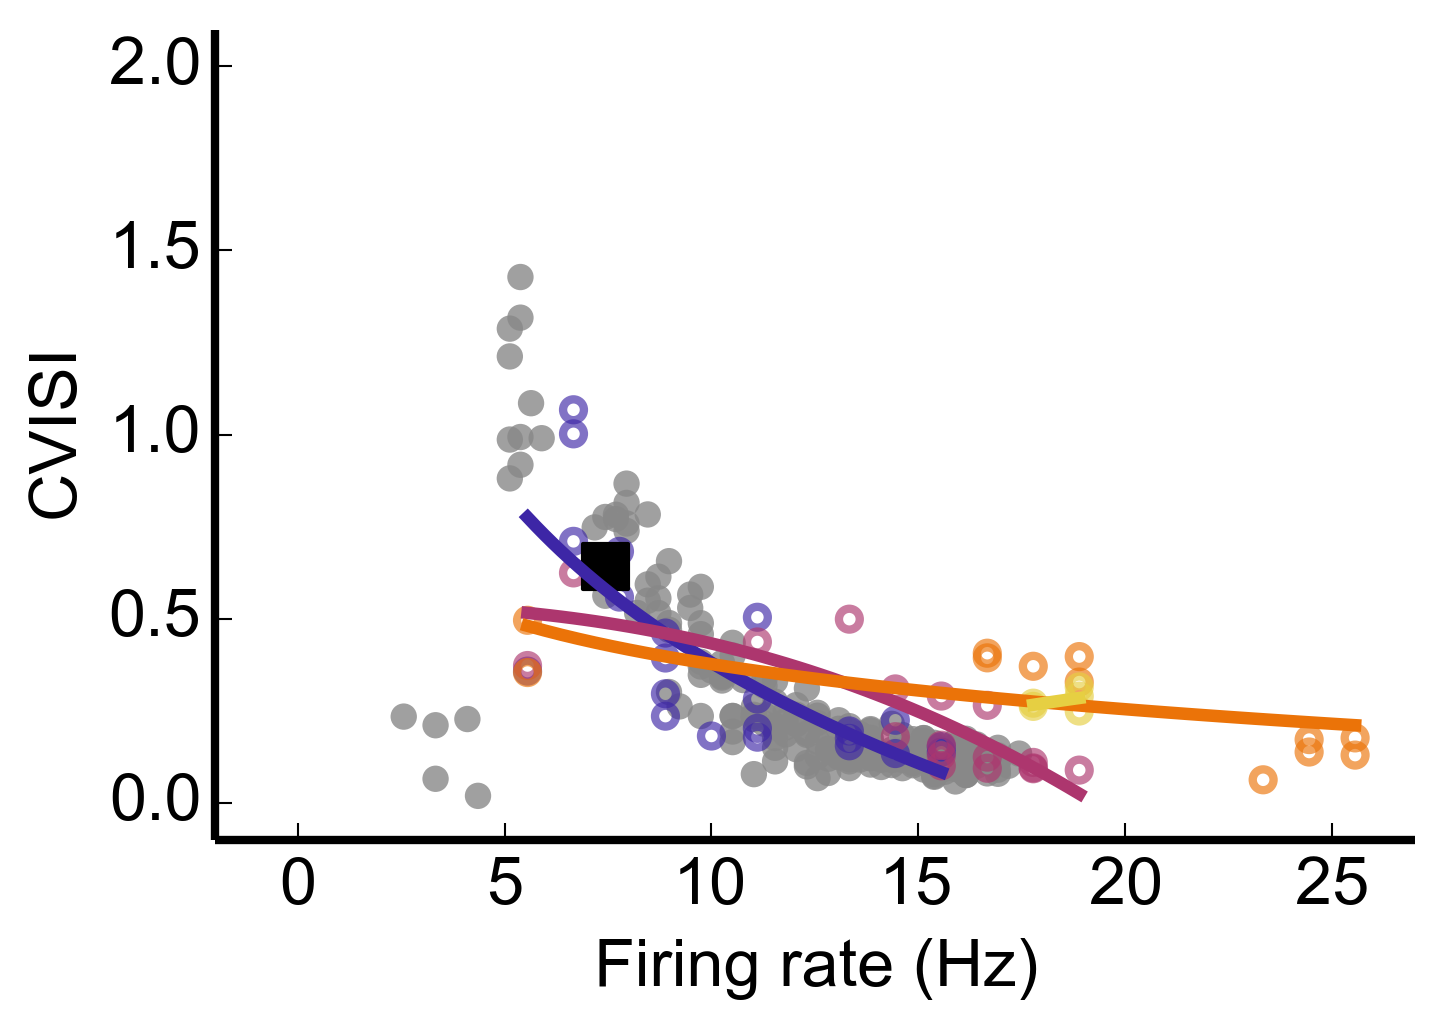

In [534]:
irr_labels = [ a*b for a in [0.001,0.01, 0.1,1.] for b in [2]] # reminder

bg_c = '#888888'

#### FF #################################################
fig = pylab.figure(figsize=(5,3))
ax = fig.add_axes([0.0, 0.0, 0.8, 0.9])
ax.scatter(fr_bg,ff_bg,lw=0,c=bg_c,s=50,)
for i in range(n_irrs): # for 4 irr values tested
    start = i*n_factors
    until = start+n_factors
    
    ffvalues = getValues(ffCollection,start,until)
    frvalues = getValues(frCollection,start,until)
    
    xs,ys = preselect(frvalues,ffvalues,condGradient=40./5,condYIntercept=40)
    #pylab.scatter(xs,ys,edgecolors=colorIrrs[i],facecolors='none',s=25,marker='o',lw=2,alpha=0.65)
    ax.scatter(xs,ys,edgecolors=colorIrrs[i],facecolors='none',s=25,marker='o',lw=2,alpha=0.65)
    xfit,yfit = fitCurve(xs,ys,ythreshold=-3)
    #pylab.plot(xfit,yfit,c=colorIrrs[i],lw=3,ms=40)
    ax.plot(xfit,yfit,c=colorIrrs[i],lw=3,ms=40)
    
    
#pylab.scatter(fr_example,ff_example,c='k',s=120,marker='s')    
ax.scatter(fr_example,ff_example,c='k',s=120,marker='s')    
#turn_off_border(pylab.gca()) 
#turn_off_border(ax) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_ylabel('FF')
ax.set_xlabel('Firing rate (Hz)')
ax.set_xlim(xmax=27,xmin=-2)
ax.set_ylim(ymax=85,ymin=-5)
#pylab.yscale('log')

ax1 = fig.add_axes([0.85, 0.0, 0.05, 0.9])
#cmap = mpl.cm.cool
#norm = mpl.colors.Normalize(vmin=5, vmax=10)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm,boundaries=intensities[:-1]+0.5,ticks=intensities[1:-1])
cb1.set_ticklabels(irr_labels)
cb1.set_label('irradiance (mW/mm$^2$)')


fig.savefig('Fig4_FF_FR.png')
fig.savefig('Fig4_FF_FR.svg')


## CV ISI #################################################
fig = pylab.figure(figsize=(5,3))
ax = fig.add_axes([0.0, 0.0, 0.8, 0.9])

ax.scatter(fr_bg,cv_bg,lw=0,c=bg_c,s=40,alpha=0.8)
for i in range(n_irrs): 
    start = i*n_factors
    until = start+n_factors
    
    cvvalues = getValues(cvCollection,start,until)
    frvalues = getValues(frCollection,start,until)
    
    xs,ys = preselect(frvalues,cvvalues,condGradient=1./8.,condYIntercept=1.)
    ax.scatter(xs,ys,edgecolors=colorIrrs[i],facecolors='none',s=25,marker='o',lw=2,alpha=0.65)
    #print xs
    #print ys
    xfit,yfit = fitCurve(xs,ys,ythreshold=0)
    ax.plot(xfit,yfit,c=colorIrrs[i],lw=3,ms=40)
    
ax.scatter(fr_example,cv_example,c='k',s=120,marker='s')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')


pylab.ylabel('CVISI')
pylab.xlabel('Firing rate (Hz)')
pylab.ylim(ymax=2.1,ymin=-0.1)
ax.set_xlim(xmax=27,xmin=-2)

#cb = pylab.colorbar(m,values=mvalues,boundaries=intensities)#ticks=intensities,
#cb.set_ticks(intensities + .1)
#cb.set_ticklabels(irr_labels)
#cb.set_label('irradiance (mW/mm$^2$)')

pylab.savefig('Fig4_CVISI_FR.png')
pylab.savefig('Fig4_CVISI_FR.svg')


# then, from command line, run:
# inkscape --verb=FitCanvasToDrawing --verb=FileSave --verb=FileClose Fig4*_FR.svg

# Deprecated code graveyard

In [303]:

%%capture
# FF and CVISI for backgroun =----- deprecated! superceded by technique that is dependent on firing rate
# 140616_replay_input_apic.py
light_on = 2100
light_dur = 1000
tstop = 4000
exp_fixedInput_single = {
    'filebase': '140616_replay_input_apic',
    'light_on':2000,
    'light_dur': 1000,
    'tstop': 4000,
    #'factors': [0.12],
    'factors': [0.125,0.25,0.5,1.,2.,4.,8.],
    #'irrs': [0.,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]+[0.5]+range(1,6),
    'irrs': [ 0.00], #range(1,6),
    'freq': 80,
    'J': 0.5,
    'syn_factor': -0.05,
}

af = run_analysis.AnalyticFrame()
af.update_params({'tstart':light_on,'tstop':light_on+light_dur,
                              'tstart_bg': 0,'tstop_bg':light_on,
                              'tstart_post':light_on+light_dur,'tstop_post':tstop})
        
af.update_cmap(9)
description = 'irr%.3f_factor%.2f_spikes80_J0.5_cellL5PC_inh-0.05_freqfactor1_shuffle5_stimpoisson_NpHR_none_ChR_none'#%(irr,factor)
exp_comp_list = [[description,'']]
expss = [ec[0] for ec in exp_comp_list]
explabels = [ec[1] for ec in exp_comp_list]
af.populate_expset(exp_fixedInput_single['filebase'],expss,explabels, [exp_fixedInput_single['irrs'], exp_fixedInput_single['factors']]) 
af.perform_analysis(['isi'])
af.submenu_save()  
af.submenu_load()
af.submenu_print()
bg_ffisi = af.get_analysis_values('ff_isi')[0]
bg_cvisi = af.get_analysis_values('cv_isi')[0]
bg_fr = af.get_analysis_values('FI')[0]



In [304]:
print bg_ffisi
print bg_cvisi
print bg_fr


[[54.837978465289666]]
[[0.64109459085885934]]
[[7.435897435897436]]


0.1 (1.0, 0.5790446966917554, 0.0, 1.0) 0
0.3 (0.23970412205706326, 1.0, 0.0, 1.0) 0
0.5 (0.0, 1.0, 0.96470316317617644, 1.0) 0
0.7 (0.14595412205706287, 0.0, 1.0, 1.0) 0
[ 0.1  0.3  0.5  0.7]
[ 0.1  0.3  0.5  0.7  0.9]


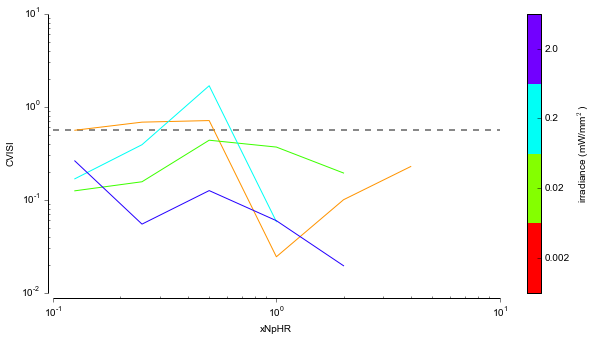

In [23]:
pylab.figure(figsize=(10,5))

# plot bg value for cvisis

m = cm.ScalarMappable(cmap=expPlot.get_cmap())
m.set_array(intensities)

#pylab.axhline(y=bg_cvisi[0], color='#888888', linewidth=2, linestyle='--')

colrs = ['#C92D22','#FFD426','#00C91E','#2F75D6']
linestyle = ['-','--',':']
n_levels = 4
nvper_level = 1

for i in range(n_irrs):
    #print i*n_factors,(i+i)*n_factors
    y_cvisi = ss[0][i*n_factors:(i+1)*n_factors]
    #print len(y_cvisi)
    c=expPlot._get_color(m,intensities[i])
    #print intensities[i], c
    #c = int(i/nvper_level)
    ls = i%nvper_level
    print intensities[i], c, ls
    #pylab.plot(exp_fixedInput['factors'],y_cvisi,c=colrs[c],ls=linestyle[ls],label='%g'%(exp_fixedInput['irrs'][i]))
    pylab.plot(exp_fixedInput['factors'],y_cvisi,c=c,ls=linestyle[ls],label='%g'%(exp_fixedInput['irrs'][i]))

turn_off_border(pylab.gca())    
pylab.yscale('log')  
pylab.xscale('log')


dc = intensities[1]-intensities[0]
mapint = np.linspace(lspace[0], lspace[1], n_irrs+1)
mvalues = mapint[:-1]
print mvalues
print mapint
cb = pylab.colorbar(m,values=mvalues,boundaries=mapint)#ticks=intensities,
cb.set_ticks(intensities + .1)
cb.set_ticklabels(exp_fixedInput['irrs'])
cb.set_label('irradiance (mW/mm$^2$)')

#pylab.legend()
pylab.xlabel('xNpHR')
pylab.ylabel('CVISI')
pylab.savefig('Fig6_CVISI.png',dpi=300)


[ 0.1  0.3  0.5  0.7]
[ 0.1  0.3  0.5  0.7  0.9]


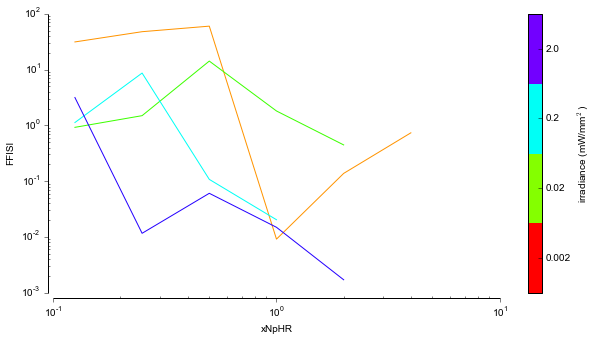

In [266]:
pylab.figure(figsize=(10,5))

#pylab.axhline(y=bg_ffisi[0], color='#888888', linewidth=2, linestyle='--')


for i in range(n_irrs):
    #print exp_fixedInput['irrs'][i],i*n_factors,(i+1)*n_factors
    y_ff = rr[0][i*n_factors:(i+1)*n_factors]
    #print y_ff
    c=expPlot._get_color(m,intensities[i])
    pylab.plot(exp_fixedInput['factors'],y_ff,c=c)

turn_off_border(pylab.gca())
pylab.yscale('log')
pylab.xscale('log')

dc = intensities[1]-intensities[0]
mapint = np.linspace(lspace[0], lspace[1], n_irrs+1)
mvalues = mapint[:-1]
print mvalues
print mapint
cb = pylab.colorbar(m,values=mvalues,boundaries=mapint)#ticks=intensities,
cb.set_ticks(intensities + .1)
cb.set_ticklabels(exp_fixedInput['irrs'])
cb.set_label('irradiance (mW/mm$^2$)')


pylab.xlabel('xNpHR')
pylab.ylabel('FFISI')
pylab.savefig('Fig6_FFISI.png',dpi=300)


In [174]:
nTrials = exp_fixedInput['ntrials']
for (i,k) in enumerate(exp_fixedInput['freq']):
    
    coll_ffisi = rr_bg[0][i*nTrials:(i+1)*nTrials]
    print coll_ffisi , i*nTrials, (i+1)*nTrials
    





[638.80959017235318, 0.97022500000352963, 595.67384811443719, 639.52097821330722, 442.94248115322705, 375.62428702422551, 643.79275443070355, 427.25869236738959, 0.018882621541836085, 396.99584335354251] 0 10
[138.28797918916578, 184.83140005476923, 143.01005983066591, 135.99794395406201, 195.42741423088444, 111.64501918195991, 126.82746735976217, 130.4112705581073, 189.85800080259196, 110.45385315407127] 10 20
[62.985665301058326, 77.934388463140607, 62.51928572604114, 75.507272645739008, 65.081445916898318, 56.302300483009283, 69.808915563550215, 56.100282612619097, 67.170352544153502, 73.684678841200494] 20 30
[37.203398413112531, 54.724942372229343, 19.526820398170543, 43.84894180356153, 37.584999611095768, 36.993460094457298, 35.129282708850056, 35.818805290019469, 51.006114885714744, 43.933425309762058] 30 40
[33.226766607481956, 24.354454814785647, 16.637206479920287, 35.269237024433615, 35.871239531576357, 22.802744610354157, 30.270959458140464, 26.689959073564332, 33.757945016

In [202]:
# hardcopied from print statement above
frss = [2.0, 1.7142857142857142, 1.7142857142857142, 2.0, 2.0, 1.7142857142857142, 2.5714285714285716, 3.4285714285714284, 2.2857142857142856, 4.0, 4.857142857142857, 5.142857142857143, 4.857142857142857, 4.857142857142857, 5.142857142857143, 5.142857142857143, 5.428571428571429, 5.142857142857143, 5.142857142857143, 5.714285714285714, 7.428571428571429, 7.428571428571429, 6.857142857142857, 7.428571428571429, 8.0, 7.142857142857143, 7.428571428571429, 8.0, 8.0, 8.285714285714286, 8.857142857142858, 8.571428571428571, 8.0, 8.571428571428571, 8.285714285714286, 8.285714285714286, 8.857142857142858, 9.142857142857142, 8.857142857142858, 9.428571428571429, 9.714285714285714, 9.428571428571429, 8.857142857142858, 9.714285714285714, 9.714285714285714, 9.142857142857142, 9.714285714285714, 9.714285714285714, 10.0, 10.0]
ffss = [638.80959017235318, 0.97022500000352963, 595.67384811443719, 639.52097821330722, 442.94248115322705, 375.62428702422551, 643.79275443070355, 427.25869236738959, 0.018882621541836085, 396.99584335354251, 138.28797918916578, 184.83140005476923, 143.01005983066591, 135.99794395406201, 195.42741423088444, 111.64501918195991, 126.82746735976217, 130.4112705581073, 189.85800080259196, 110.45385315407127, 62.985665301058326, 77.934388463140607, 62.51928572604114, 75.507272645739008, 65.081445916898318, 56.302300483009283, 69.808915563550215, 56.100282612619097, 67.170352544153502, 73.684678841200494, 37.203398413112531, 54.724942372229343, 19.526820398170543, 43.84894180356153, 37.584999611095768, 36.993460094457298, 35.129282708850056, 35.818805290019469, 51.006114885714744, 43.933425309762058, 33.226766607481956, 24.354454814785647, 16.637206479920287, 35.269237024433615, 35.871239531576357, 22.802744610354157, 30.270959458140464, 26.689959073564332, 33.757945016943928, 26.778427670376129]
cvss = [1.5916422646365678, 0.19700000000000001, 1.5785762709868338, 1.5932985146047483, 1.5325336493493447, 1.480238980113106, 1.7910378581772242, 1.5325483410305418, 0.030214880353348385, 1.425283591742609, 0.99469312582934477, 1.0690944648390499, 0.97582362689692814, 0.93110142665583406, 1.1415972804506478, 0.82208730364178539, 0.95399627890881633, 0.97125113136360175, 1.1892988658910022, 0.92983028138184309, 0.71267771725557638, 0.79873360804491034, 0.69626615033704675, 0.80427634480670629, 0.72972842584425723, 0.66912779929697419, 0.78510816258675953, 0.70678804257944283, 0.74359930610419511, 0.83516693157847433, 0.55974044467701711, 0.71131785293826089, 0.37634498066767252, 0.61065281486820289, 0.56039704528419743, 0.55612727217044244, 0.54523545131464024, 0.55704311395565864, 0.69835736826933692, 0.67508800104535804, 0.56610100800805174, 0.46676061452006729, 0.37948870847869792, 0.57729401370829769, 0.58857890636660892, 0.45416554970911166, 0.54493453105040091, 0.50893208769415077, 0.57687987353009584, 0.54693303249314207]

[  7.77777778   7.77777778   6.66666667   3.33333333   3.33333333
   3.33333333   2.22222222  11.11111111  11.11111111  10.           8.88888889
   4.44444444   3.33333333   3.33333333  15.55555556  14.44444444
  15.55555556  14.44444444  11.11111111   5.55555556   3.33333333]
[  3.12171518e+01   4.76337082e+01   5.98785086e+01   9.13149351e-03
   1.37500000e-01   7.33730159e-01   0.00000000e+00   2.65688913e+00
   3.62730081e+00   3.11765390e+00   2.40680139e+01   5.55249842e-01
   9.56616052e-02   3.98784370e+00   1.51234570e+00   1.15640978e+00
   1.26196061e+00   3.57876609e+00   1.85759367e+01   1.62251291e+00
   6.87500000e-02]
[ True  True  True False False False False  True  True  True  True False
 False  True  True  True  True  True  True False False]
[  7.77777778   7.77777778   6.66666667  11.11111111  11.11111111  10.
   8.88888889   3.33333333  15.55555556  14.44444444  15.55555556
  14.44444444  11.11111111]
[ 31.21715175  47.63370823  59.87850862   2.65688913   3.6273008

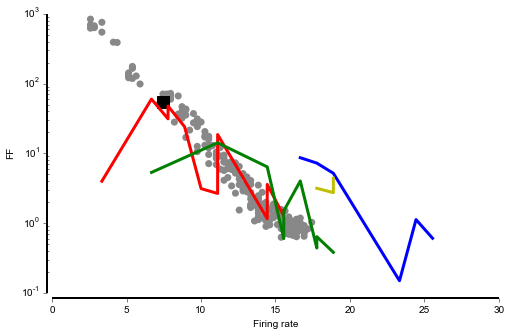

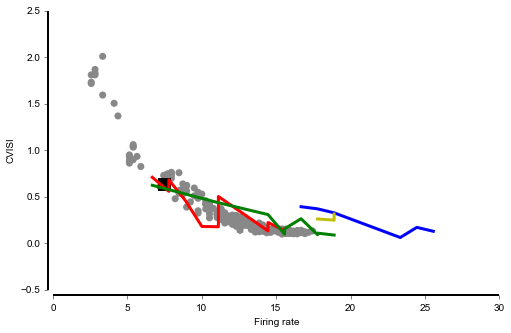

In [218]:
colors = ['r','g','b','y']
irr_labels = [ a*b for a in [0.001,0.01, 0.1,1.] for b in [2]] # reminder

bg_c = '#888888'

def preselect1(xs,ys,xthresh=6,ythresh=10,useAnd=False):
    ys = np.array(ys)
    xs = np.array(xs)
    print xs
    print ys
    if useAnd:
        cond = (ys >=ythresh) & (xs >= xthresh)
    else:
        cond = (ys >=ythresh) | (xs >= xthresh)
    print cond
    xs = xs[cond]
    ys = ys[cond]
    print xs
    print ys
    xs_sorted, ys_sorted = zip(*sorted(zip(xs, ys)))#, key=operator.itemgetter(0)))
    return xs_sorted,ys_sorted

def preselect(xs,ys,condGradient=1,condYIntercept=1,tmp=1,xthresh=6,ythresh=10,useAnd=False):
    ys = np.array(ys)
    xs = np.array(xs)
    print xs
    print ys
    cond = (ys+condGradient*xs > condYIntercept) 
    print cond
    xs = xs[cond]
    ys = ys[cond]
    print xs
    print ys
    xs_sorted, ys_sorted = zip(*sorted(zip(xs, ys)))#, key=operator.itemgetter(0)))
    return xs_sorted,ys_sorted


#### FF
pylab.figure(figsize=(8,5))
pylab.scatter(fr_bg,ff_bg,lw=0,c=bg_c,s=50,)
for i in range(n_irrs): # for 4 irr values tested
    start = i*n_factors
    until = start+n_factors
    
    ffvalues = ff80[start:until]+ff120[start:until]+ff220[start:until]
    frvalues = fr80[start:until]+fr120[start:until]+fr220[start:until]

    xs,ys = preselect(frvalues,ffvalues,condGradient=0.5,condYIntercept=5)
    pylab.plot(xs,ys,c=colors[i],lw=3,ms=40)
    
    
pylab.scatter(fr_example,ff_example,c='k',s=150,marker='s')    
turn_off_border(pylab.gca()) 

pylab.ylabel('FF')
pylab.xlabel('Firing rate')
#pylab.ylim(ymax=80,ymin=-10)
pylab.yscale('log')



## CV ISI
pylab.figure(figsize=(8,5))
pylab.scatter(fr_bg,cv_bg,lw=0,c=bg_c,s=50)
for i in range(n_irrs): 
    start = i*n_factors
    until = start+n_factors
    
    cvvalues = cv80[start:until]+cv120[start:until]+cv220[start:until]
    frvalues = fr80[start:until]+fr120[start:until]+fr220[start:until]
    
    xs,ys = preselect(frvalues,cvvalues,condGradient=0.1,condYIntercept=1.)#xthresh=4,ythresh=0,useAnd=True)
    pylab.plot(xs,ys,c=colors[i],lw=3,ms=40)
    
pylab.scatter(fr_example,cv_example,c='k',s=150,marker='s')
turn_off_border(pylab.gca()) 

pylab.ylabel('CVISI')
pylab.xlabel('Firing rate')




In [20]:
lspace = (0.1,0.9)
intensities =  np.linspace(lspace[0], lspace[1], n_irrs+1) #np.linspace(0.1, 0.9, n_irrs)
expPlot = ExperimentPlotter()
expPlot.update_cmap_index(7)
print intensities

jet <type 'str'>
--->  jet <type 'str'>
hsv <type 'str'>
--->  hsv <type 'str'>
[ 0.1  0.3  0.5  0.7  0.9]


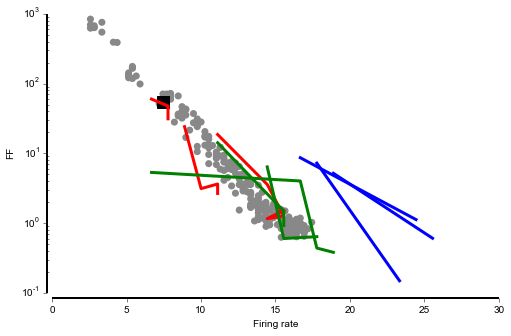

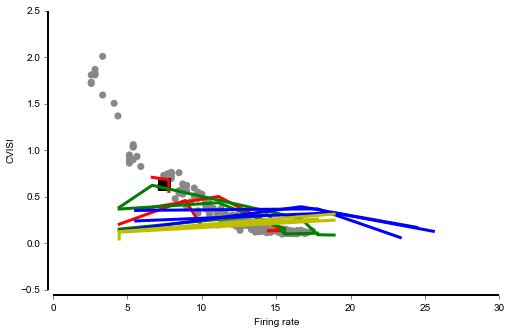

In [207]:
#colors = ['r','g','b','y']
irr_labels = [ a*b for a in [0.001,0.01, 0.1,1.] for b in [2]] # reminder

bg_c = '#888888'

def preselect(xs,ys,xthresh=6,ythresh=10,useAnd=False):
    ys = np.array(ys)
    xs = np.array(xs)
    #print xs
    #print ys
    if useAnd:
        cond = (ys >=ythresh) & (xs >= xthresh)
    else:
        cond = (ys >=ythresh) | (xs >= xthresh)
    #print cond
    xs = xs[cond]
    ys = ys[cond]
    #print xs
    #print ys
    return xs,ys


#### FF
pylab.figure(figsize=(8,5))
pylab.scatter(fr_bg,ff_bg,lw=0,c=bg_c,s=50,)
for i in range(n_irrs): 
    start = i*n_factors
    until = start+n_factors
    xs,ys = preselect(fr80[start:until],ff80[start:until])
    pylab.plot(xs,ys,c=colors[i],lw=3,ms=40)
    xs,ys = preselect(fr120[start:until],ff120[start:until])
    pylab.plot(xs,ys,c=colors[i],lw=3,ms=40)
    xs,ys = preselect(fr220[start:until],ff220[start:until])
    pylab.plot(xs,ys,c=colors[i],lw=3,ms=40)
    
    
pylab.scatter(fr_example,ff_example,c='k',s=150,marker='s')
turn_off_border(pylab.gca()) 

pylab.ylabel('FF')
pylab.xlabel('Firing rate')
#pylab.ylim(ymax=80,ymin=-10)
pylab.yscale('log')



#### CV

pylab.figure(figsize=(8,5))
pylab.scatter(fr_bg,cv_bg,lw=0,c=bg_c,s=50)
for i in range(n_irrs): 
    start = i*n_factors
    until = start+n_factors
    xs,ys = preselect(fr80[start:until],cv80[start:until],xthresh=4,ythresh=0,useAnd=True)
    pylab.plot(xs,ys,c=colors[i],lw=3,ms=40)
    xs,ys = preselect(fr120[start:until],cv120[start:until],xthresh=4,ythresh=0,useAnd=True)
    pylab.plot(xs,ys,c=colors[i],lw=3,ms=40)
    xs,ys = preselect(fr220[start:until],cv220[start:until],xthresh=4,ythresh=0,useAnd=True)
    pylab.plot(xs,ys,c=colors[i],lw=3,ms=40)
    
pylab.scatter(fr_example,cv_example,c='k',s=150,marker='s')
turn_off_border(pylab.gca()) 

pylab.ylabel('CVISI')
pylab.xlabel('Firing rate')

